In [1]:
import numpy as np 
import pandas as pd
from tqdm import tqdm
import itertools
import random
import os
import gc
import plotly.express as px
import plotly.graph_objs as go
# import pandas_profiling as pdp
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [2]:
deliv = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [3]:
deliv.head(3)

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0           1     legbyes          0              NaN            NaN     NaN  
1           0         NaN          0              NaN            NaN     NaN  
2           1       wides          0              NaN            NaN     NaN

In [4]:
match.head(3)

id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   

                   team2                  toss_winner toss_decision  \
0  Kolkata Knight Riders  Royal Challengers Bangalore         field   
1    Chennai Super Kings          Chennai Super Kings           bat   
2       Rajasthan Royals             Rajasthan Royals           bat   

                  winner   result  result_margin  target_runs  target_overs  \
0  Kolkata Knight Riders     runs          140.0        223.0          20.0   
1    Chennai Super Kings     runs           33.0        241.0          20.0   
2       Delhi Daredevils  wickets            9.0        130.0          20.0   

  super_over method    umpire1         umpire2  
0          N    NaN  Asad Rauf     RE Koertzen  
1          N    NaN  MR Benson      SL Shastri  
2          N    NaN  Aleem Dar  GA Pratapkumar

In [5]:
deliv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
print(deliv.isnull().sum())
print('\n')
print(match.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [8]:
print(deliv.columns ,  '\n\n')
print(match.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object') 


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


In [9]:
print(deliv.shape , '\n')
print(match.shape)

(260920, 17) 

(1095, 20)


In [10]:
# Filling missing city values based on venue
match.loc[(match['city'].isna()) & (match['venue'] == 'Sharjah Cricket Stadium'), 'city'] = 'Sharjah'
match.loc[(match['city'].isna()) & (match['venue'] == 'Dubai International Cricket Stadium'), 'city'] = 'Dubai'

match['city'].isnull().sum()

0

In [11]:
#replacing season in correct format
match.replace({'season': {"2020/21": "2020", "2009/10": "2010", "2007/08": "2008"}}, inplace=True)

In [12]:
match.value_counts('city')

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Dubai              46
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Sharjah            28
Visakhapatnam      15
Durban             15
Lucknow            14
Dharamsala         13
Centurion          12
Rajkot             10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cape Town           7
Cuttack             7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Guwahati            3
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
dtype: int64

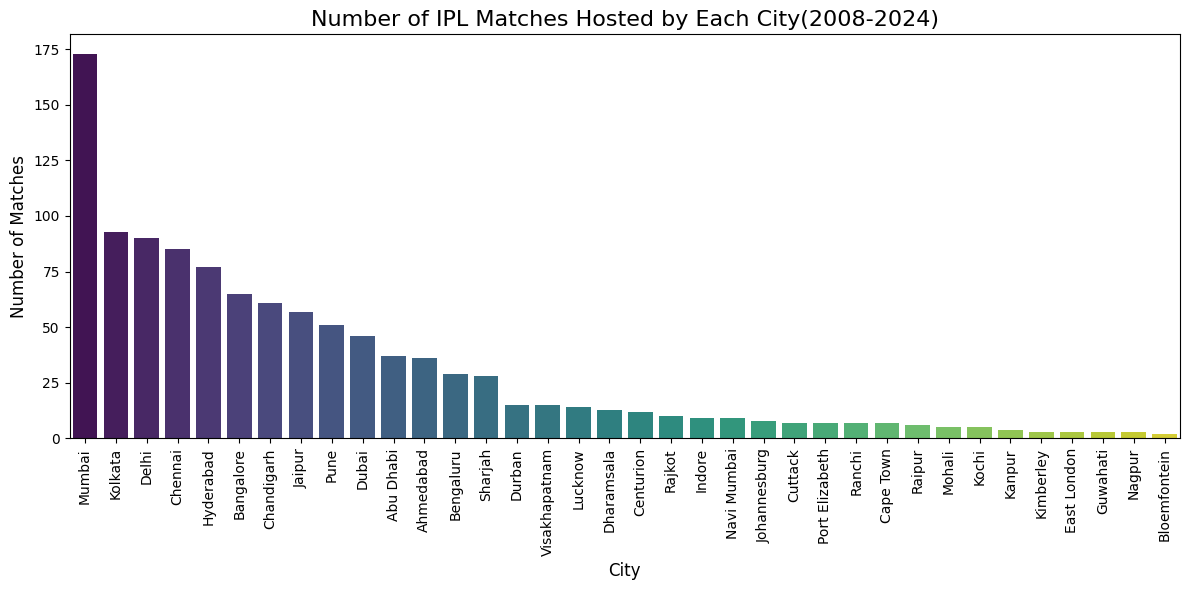

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace NaN values in 'city' column with 'Unknown' and count the occurrences
city_counts = match['city'].replace(np.NaN, 'Unknown').value_counts()

# Creating a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')

# Add titles and labels
plt.title('Number of IPL Matches Hosted by Each City(2008-2024)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

In [14]:
match['city'].fillna('Mumbai', inplace=True) # fill with mode of this columns 
match['winner'].fillna('No Result', inplace=True)
match['player_of_match'].fillna('No Result',inplace=True)
median_margin = match['result_margin'].median()
match['result_margin'].fillna(median_margin, inplace=True)
median_target_runs= match['target_runs'].median()
match['target_runs'].fillna(median_target_runs, inplace=True)
median_target_overs = match['target_overs'].median()
match['target_overs'].fillna(median_target_overs, inplace=True)
match['method'].fillna('No method applied', inplace=True)

In [15]:
match.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [16]:
#Replacing Team old name to new name , keeping a single name for a single city based franchise
team_map ={"Mumbai Indians":"Mumbai Indians",
          "Chennai Super Kings":"Chennai Super Kings",
          "Kolkata Knight Riders":"Kolkata Knight Riders",
          "Royal Challengers Bangalore":"Royal Challengers Bengaluru",
          "Royal Challengers Bengaluru":"Royal Challengers Bengaluru",
          "Rajasthan Royals":"Rajasthan Royals",
          "Kings XI Punjab":"Punjab Kings",
          "Punjab Kings":"Punjab Kings",
          "Sunrisers Hyderabad":"Sunrisers Hyderabad",
          "Deccan Chargers":"Sunrisers Hyderabad",
          "Delhi Capitals":"Delhi Capitals",
          "Delhi Daredevils":"Delhi Capitals",
          "Gujarat Titans":"Gujarat Titans",
          "Gujarat Lions":"Gujarat Titans",
          "Lucknow Super Giants":"Lucknow Super Giants",
          "Pune Warriors":"Rising Pune Supergiants",
          "Rising Pune Supergiant":"Rising Pune Supergiants",
          "Rising Pune Supergiants":"Rising Pune Supergiants",
          "Kochi Tuskers Kerala":"Kochi Tuskers Kerala"}

In [17]:
#For Match table 
match['team1']= match['team1'].map(team_map)
match['team2']= match['team2'].map(team_map)
match['winner']= match['winner'].map(team_map)
match['toss_winner']= match['toss_winner'].map(team_map)

#For Deliverise Tables 
deliv['batting_team']= deliv['batting_team'].map(team_map)
deliv['bowling_team']= deliv['bowling_team'].map(team_map)

In [18]:
match['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [19]:
match['venue']=match['venue'].str.replace('Feroz Shah Kotla','Arun Jaitley Stadium')
match['venue']=match['venue'].str.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium')
match['venue']=match['venue'].str.replace('Eden Gardens, Kolkata','Eden Gardens')
match['venue']=match['venue'].str.replace('Eden Gardens, Kolkata, Kolkata','Eden Gardens')
match['venue']=match['venue'].str.replace('Wankhede Stadium, Mumbai','Wankhede Stadium')
match['venue']=match['venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium, Mohali')
match['venue']=match['venue'].str.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium, Uppal')

match['venue'] = match['venue'].replace(
    ['M Chinnaswamy Stadium, Bengaluru', 'M Chinnaswamy Stadium','M.Chinnaswamy Stadium'], 
    'M Chinnaswamy Stadium, Bengaluru'
)

match['venue'] = match['venue'].replace(
    ['MA Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai'], 
    'MA Chidambaram Stadium, Chepauk'
)

# Replace both patterns in a single step
match['venue'] = match['venue'].replace(
    ['Dr DY Patil Sports Academy', 'Dr DY Patil Sports Academy, Mumbai'], 
    'DY Patil Stadium, Mumbai'
)
match['venue'] = match['venue'].replace(
    ['Subrata Roy Sahara Stadium', 'Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium'], 
    'MCA Stadium , Pune'
)

match['venue']=match['venue'].str.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam','Vizag Stadium')
match['venue']=match['venue'].str.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium','Vizag Stadium')

match['venue']=match['venue'].str.replace('Sardar Patel Stadium, Motera','Narendra Modi Stadium, Ahmedabad')

match['venue'] = match['venue'].replace(
    ['Brabourne Stadium', 'Brabourne Stadium, Mumbai','Brabourne Stadium, Mumbai, Mumbai'], 
    'Brabourne Stadium, Mumbai'
)

match['venue'] = match['venue'].replace(
    ['Sawai Mansingh Stadium', 'Sawai Mansingh Stadium, Jaipur'], 
    'Sawai Mansingh Stadium, Jaipur'
)

match['venue'] = match['venue'].replace(
    ['Sheikh Zayed Stadium', 'Zayed Cricket Stadium, Abu Dhabi'], 
    'Sheikh Zayed Cricket Stadium, Abu Dhabi'
)

match['venue'] = match['venue'].replace(
    ['Himachal Pradesh Cricket Association Stadium', 'Himachal Pradesh Cricket Association Stadium, Dharamsala'], 
    'Dharamsala Stadium'
)

match['venue']=match['venue'].str.replace('Punjab Cricket Association Stadium, Mohali','Mohali Stadium')
match['venue']=match['venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Mohali Stadium')
match['venue']=match['venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Mohali Stadium')
match['venue']=match['venue'].str.replace('Punjab Cricket Association IS Bindra Stadium','Mohali Stadium')


In [20]:
stadium_data=match.value_counts('venue').reset_index()
stadium_data.columns = ['stadium', 'Number of matches']
Top_25_stadium=stadium_data.head(35)
Top_25_stadium.style.background_gradient(cmap='cividis')

In [21]:
#Trend of Total Matches Over Seasons
match['season'].value_counts().to_frame().T

2013  2023  2012  2022  2011  2024  2018  2021  2020  2019  2016  \
season    76    74    74    74    73    71    60    60    60    60    60   

        2014  2010  2017  2015  2008  2009  
season    60    60    59    59    58    57

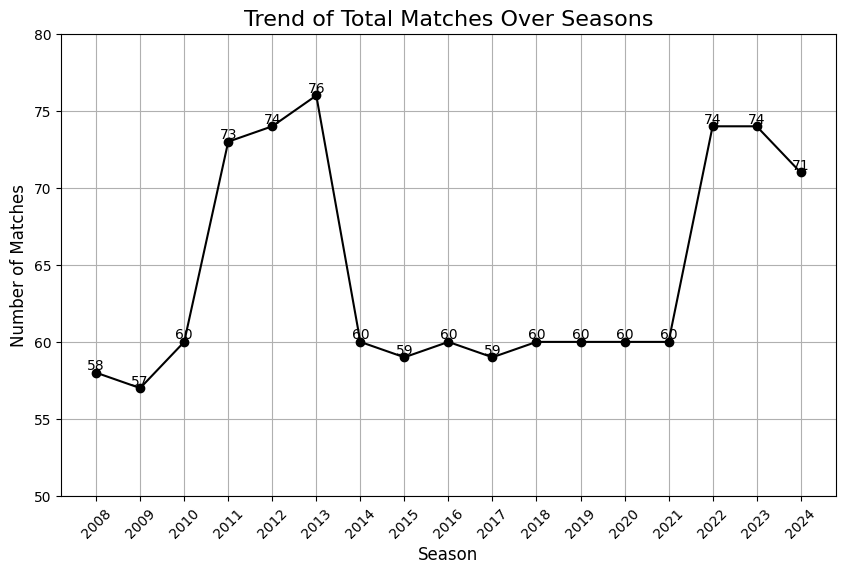

In [22]:
import matplotlib.pyplot as plt

season_counts = match['season'].value_counts().sort_index()

# Ploting the trend as a line chart
plt.figure(figsize=(10, 6))  
plt.plot(season_counts.index, season_counts.values, marker='o', linestyle='-', color='black')

# Adding titles and labels
plt.title('Trend of Total Matches Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.ylim(50,80)

# Annotating each data point with the value
for i, value in enumerate(season_counts.values):
    plt.text(season_counts.index[i], value, str(value), fontsize=10, ha='center', va='bottom')
plt.xticks(rotation=45)  
plt.grid(True)           
plt.show()

DISTRIBUTION OF TARGET RUNS ...

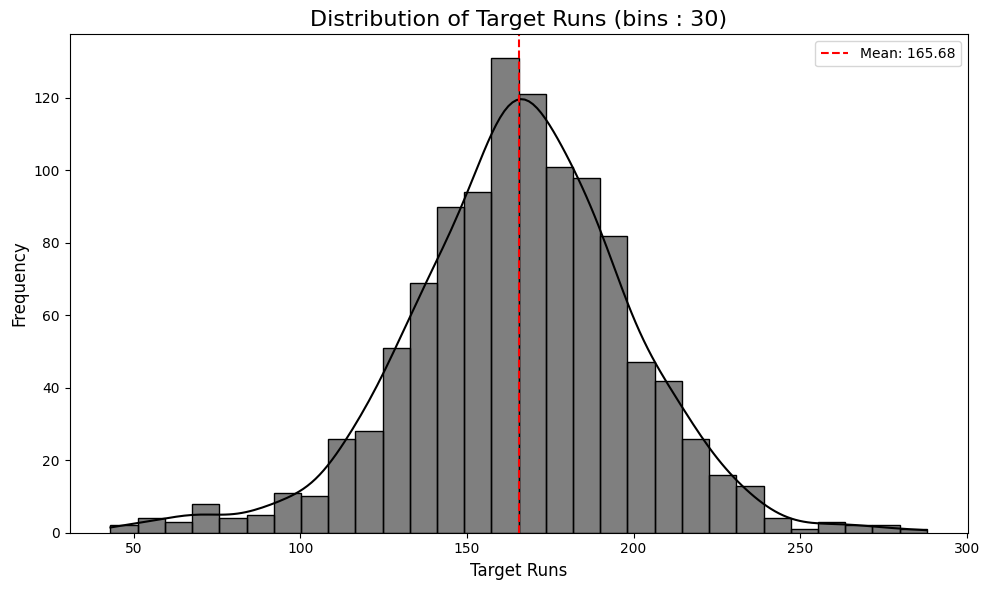

Mean Target Run 2008-2024 : 165.68493150684932


In [23]:
# Calculating the mean of 'target_runs'
mean_target_runs = match['target_runs'].mean()

# Creating histogram plot to show the distribution 
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(match['target_runs'].dropna(), bins=30, kde=True, color='black') 

# Adding a vertical line for the mean
plt.axvline(mean_target_runs, color='red', linestyle='--', label=f'Mean: {mean_target_runs:.2f}')

# Adding titles and labels
plt.title('Distribution of Target Runs (bins : 30)', fontsize=16)
plt.xlabel('Target Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()



#Average Target Run in IPL Matches
print('Mean Target Run 2008-2024 :' , mean_target_runs)

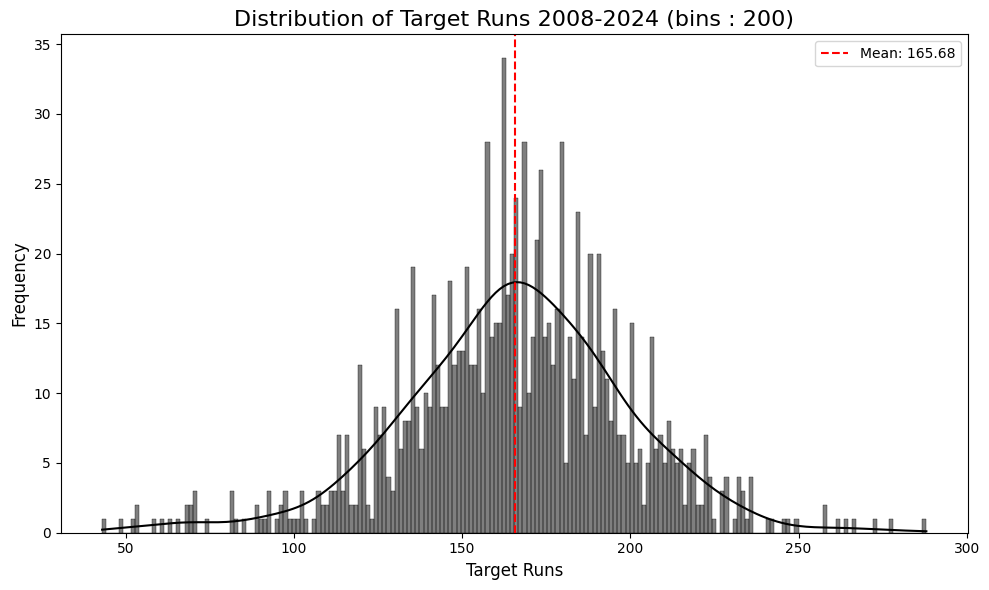

Mean Target Run 2008-2024 : 165.68493150684932


In [24]:
# Calculating the mean of 'target_runs'
mean_target_runs = match['target_runs'].mean()

# Creating histogram plot to show the distribution 
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(match['target_runs'].dropna(), bins=200, kde=True, color='black') 

# Adding a vertical line for the mean
plt.axvline(mean_target_runs, color='red', linestyle='--', label=f'Mean: {mean_target_runs:.2f}')

# Adding titles and labels
plt.title('Distribution of Target Runs 2008-2024 (bins : 200)', fontsize=16)
plt.xlabel('Target Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()


#Average Target Run in IPL Matches
print('Mean Target Run 2008-2024 :' , mean_target_runs)

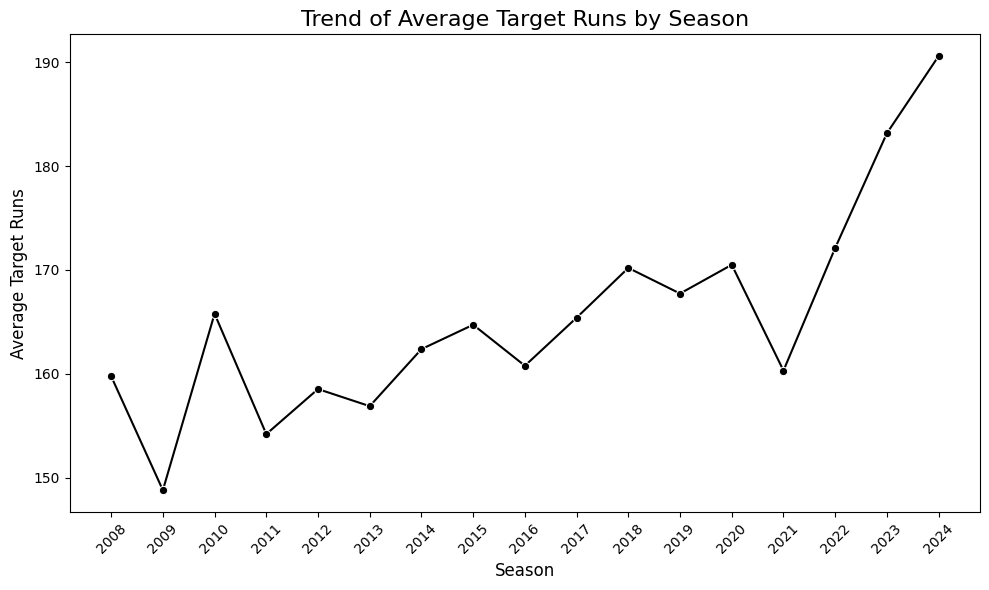

In [25]:
# avg target run by season 
avg_run_byseason = pd.pivot_table(data=match, index='season', values='target_runs', aggfunc='mean')
avg_run_byseason.reset_index(inplace=True)

# Creating line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_run_byseason, x='season', y='target_runs', marker='o', color='black')

# Adding titles and labels
plt.title('Trend of Average Target Runs by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Target Runs', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

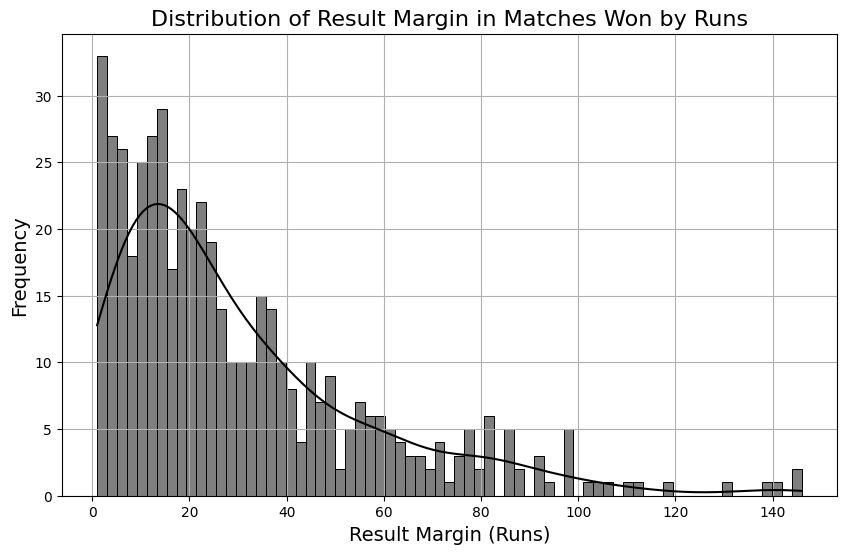

In [26]:
# distribution of results won by runs
runs_margin = match[match['result'] == 'runs']['result_margin']

# Ploting the distribution of result margins using histogram 
plt.figure(figsize=(10, 6))
sns.histplot(runs_margin, bins=71, kde=True, color='black')

# Adding titles and labels
plt.title('Distribution of Result Margin in Matches Won by Runs', fontsize=16)
plt.xlabel('Result Margin (Runs)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

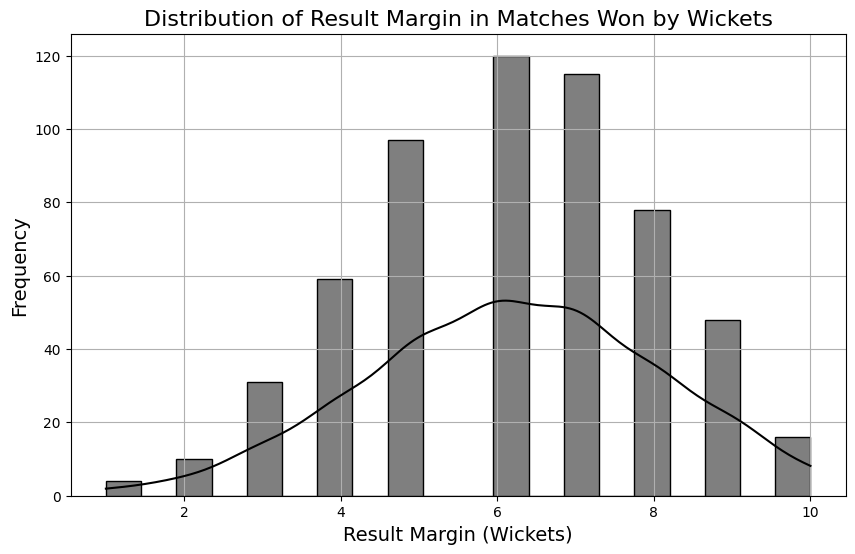

In [27]:
# distribution of results won by wickets
wickets_margin = match[match['result'] == 'wickets']['result_margin']

# Plot the distribution of result margins using histogram
plt.figure(figsize=(10, 6))
sns.histplot(wickets_margin, bins=20, kde=True, color='black')

# Adding titles and labels
plt.title('Distribution of Result Margin in Matches Won by Wickets', fontsize=16)
plt.xlabel('Result Margin (Wickets)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

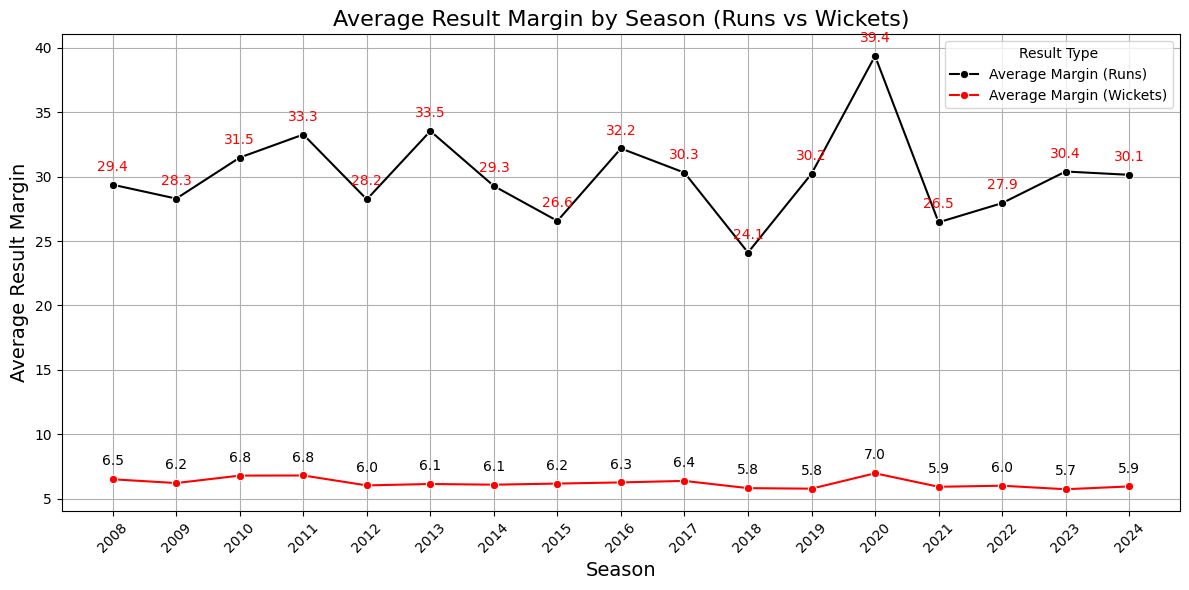

In [28]:
# average result margin across seasons for both runs and wickets
result_margins = match[(match['result'] == 'runs') | (match['result'] == 'wickets')]

# Creating a pivot table for average result margins by season and result type
avg_result = pd.pivot_table(
    data=result_margins, 
    index='season', 
    columns='result', 
    values='result_margin', 
    aggfunc='mean'
)

# Resetting the index for plotting
avg_result.reset_index(inplace=True)

# Plotting the average result margins
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_result, x='season', y='runs', marker='o', label='Average Margin (Runs)', color='black')
sns.lineplot(data=avg_result, x='season', y='wickets', marker='o', label='Average Margin (Wickets)', color='red')



# Adding titles and labels
plt.title('Average Result Margin by Season (Runs vs Wickets)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Result Margin', fontsize=14)
plt.legend(title='Result Type')

# Showing the values on markers
for index, row in avg_result.iterrows():
    plt.annotate(f'{row["runs"]:.1f}', 
                 (row['season'], row['runs']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='red')
    
    plt.annotate(f'{row["wickets"]:.1f}', 
                 (row['season'], row['wickets']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='black')

plt.grid()
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [29]:
winning_data = match.value_counts('winner').reset_index(name='Number of matches win')
fig = px.pie(winning_data, values="Number of matches win", names="winner")
fig.update_layout(
    template="plotly_white",
    title={
        'text': 'Which Teams Dominate IPL From Beginning',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial', 'color': '#ff0000'}
    }
)

fig.show()

In [30]:
runs_data=match.groupby('season')['target_runs'].sum().reset_index()
runs_data.columns = ['Season', 'Total Runs']


In [31]:
runs_data

Season  Total Runs
0    2008      9267.0
1    2009      8482.0
2    2010      9947.0
3    2011     11257.0
4    2012     11732.0
5    2013     11924.0
6    2014      9743.0
7    2015      9719.0
8    2016      9647.0
9    2017      9759.0
10   2018     10212.0
11   2019     10064.0
12   2020     10230.0
13   2021      9619.0
14   2022     12737.0
15   2023     13554.0
16   2024     13532.0

In [32]:
# Removing rows where the winner is missing
match_cleaned_1 = match.dropna(subset=['winner'])

# Grouping by toss decision and counting how often each decision leads to a win
wins_by_decision = match_cleaned_1.groupby('toss_decision').size().reset_index(name='wins')

# Calculating the percentage of matches won by teams batting first vs. fielding first
total_matches = match_cleaned_1.shape[0]
wins_by_decision['percentage'] = (wins_by_decision['wins'] / total_matches) * 100

# Displaying the result
print(wins_by_decision)

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(data=wins_by_decision, x='toss_decision', y='percentage',color='grey')

# Adding titles and labels
plt.title('Percentage of Matches Won by Toss Decision', fontsize=16)
plt.xlabel('Toss Decision (Bat First vs Field First)', fontsize=14)
plt.ylabel('Percentage of Wins (%)', fontsize=14)

# Adding values on top of the bars
for index, row in wins_by_decision.iterrows():
    plt.text(index, row['percentage'] + 1, f'{row["percentage"]:.1f}%', 
             ha='center', fontsize=12)

plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()

  toss_decision  wins  percentage
0           bat   390   35.779817
1         field   700   64.220183


In [33]:
import pandas as pd
#total match played by team 
total_matches= (match['team1'].value_counts()+match['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
# Count of wins for each team
total_wins = match['winner'].value_counts().rename_axis('Team').reset_index(name='Total_Wins')

# Count of wins when chasing a target
team_chasing = match[match['toss_decision'] == 'field']['winner'].value_counts().rename_axis('Team').reset_index(name='Chasing_Wins')

# Count of wins when batting first
team_batting_first = match[match['toss_decision'] == 'bat']['winner'].value_counts().rename_axis('Team').reset_index(name='Batting_First_Wins')


# Merge all the DataFrames
merged_df = total_matches.merge(total_wins,on='Team',how='outer') \
    .merge(team_chasing, on='Team', how='outer') \
    .merge(team_batting_first, on='Team', how='outer') 
    

# Fill NaN values with 0
merged_df= merged_df.fillna(0)
#sorting by total match played
merged_df.sort_values(by='Total_Match_Played', ascending=False, inplace=True)
# Display the final merged DataFrame
merged_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

Total_Match_Played  Total_Wins  Chasing_Wins  \
Team                                                                        
Mumbai Indians                              261         144            90   
Chennai Super Kings                         238         138            75   
Kolkata Knight Riders                       251         131            81   
Royal Challengers Bengaluru                 255         123            85   
Sunrisers Hyderabad                         257         117            73   
Delhi Capitals                              252         115            73   
Punjab Kings                                246         112            84   
Rajasthan Royals                            221         112            69   
Gujarat Titans                               75          41            30   
Rising Pune Supergiants                      76          27            16   
Lucknow Super Giants                         44          24            18   
Kochi Tuskers Kerala                         14           6             6   

                             Batting_First_Wins  
Team                                             
Mumbai Indians                             54.0  
Chennai Super Kings                        63.0  
Kolkata Knight Riders                      50.0  
Royal Challengers Bengaluru                38.0  
Sunrisers Hyderabad                        44.0  
Delhi Capitals                             42.0  
Punjab Kings                               28.0  
Rajasthan Royals                           43.0  
Gujarat Titans                             11.0  
Rising Pune Supergiants                    11.0  
Lucknow Super Giants                        6.0  
Kochi Tuskers Kerala                        0.0

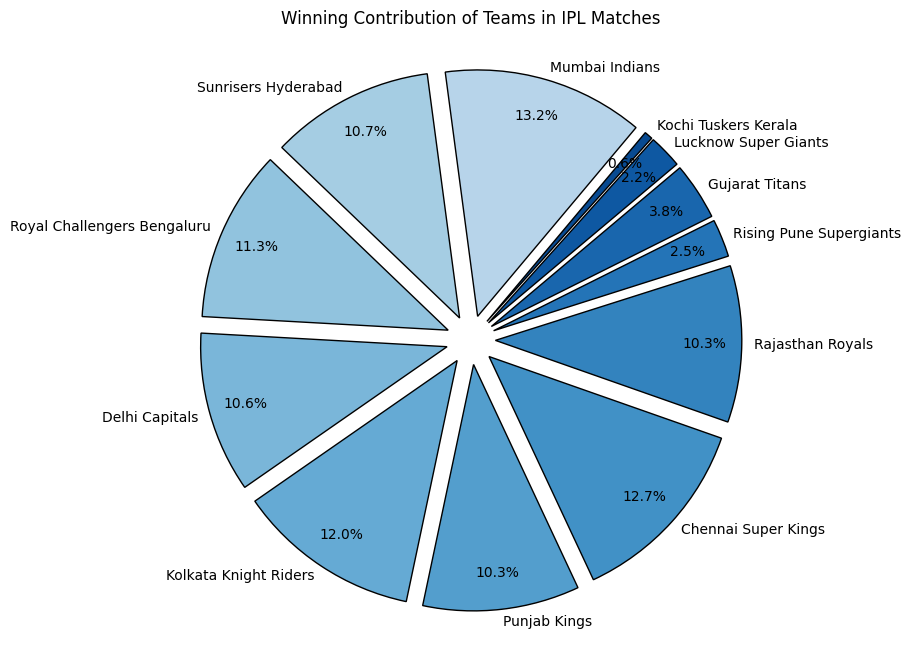

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a pie chart for showing wining destribution of team in all wining matches 
plt.figure(figsize=(8, 8))
explode = [0.1] * len(merged_df)  
plt.pie(
    merged_df['Total_Wins'],  
    labels=merged_df['Team'],  
    autopct='%1.1f%%',  
    startangle=50,  
    colors=plt.cm.Blues(np.linspace(0.3, 0.9, len(merged_df))),  
    wedgeprops={'edgecolor': 'black'},  
    explode=explode,  
    pctdistance=0.85,  
    labeldistance=1.05  
)

plt.title('Winning Contribution of Teams in IPL Matches')

# Show the pie chart
plt.show()

In [35]:
# Create a copy of the merged DataFrame to keep the original intact
percentage_df = merged_df.copy()

# Convert columns to percentage
percentage_df['Total_Wins'] = (percentage_df['Total_Wins'] / percentage_df['Total_Match_Played']) * 100
percentage_df['Chasing_Wins'] = (percentage_df['Chasing_Wins'] / merged_df['Total_Wins']) * 100
percentage_df['Batting_First_Wins'] = (percentage_df['Batting_First_Wins'] / merged_df['Total_Wins']) * 100
percentage_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

Total_Match_Played  Total_Wins  Chasing_Wins  \
Team                                                                        
Chennai Super Kings                         238   57.983193     54.347826   
Mumbai Indians                              261   55.172414     62.500000   
Gujarat Titans                               75   54.666667     73.170732   
Lucknow Super Giants                         44   54.545455     75.000000   
Kolkata Knight Riders                       251   52.191235     61.832061   
Rajasthan Royals                            221   50.678733     61.607143   
Royal Challengers Bengaluru                 255   48.235294     69.105691   
Delhi Capitals                              252   45.634921     63.478261   
Punjab Kings                                246   45.528455     75.000000   
Sunrisers Hyderabad                         257   45.525292     62.393162   
Kochi Tuskers Kerala                         14   42.857143    100.000000   
Rising Pune Supergiants                      76   35.526316     59.259259   

                             Batting_First_Wins  
Team                                             
Chennai Super Kings                   45.652174  
Mumbai Indians                        37.500000  
Gujarat Titans                        26.829268  
Lucknow Super Giants                  25.000000  
Kolkata Knight Riders                 38.167939  
Rajasthan Royals                      38.392857  
Royal Challengers Bengaluru           30.894309  
Delhi Capitals                        36.521739  
Punjab Kings                          25.000000  
Sunrisers Hyderabad                   37.606838  
Kochi Tuskers Kerala                   0.000000  
Rising Pune Supergiants               40.740741

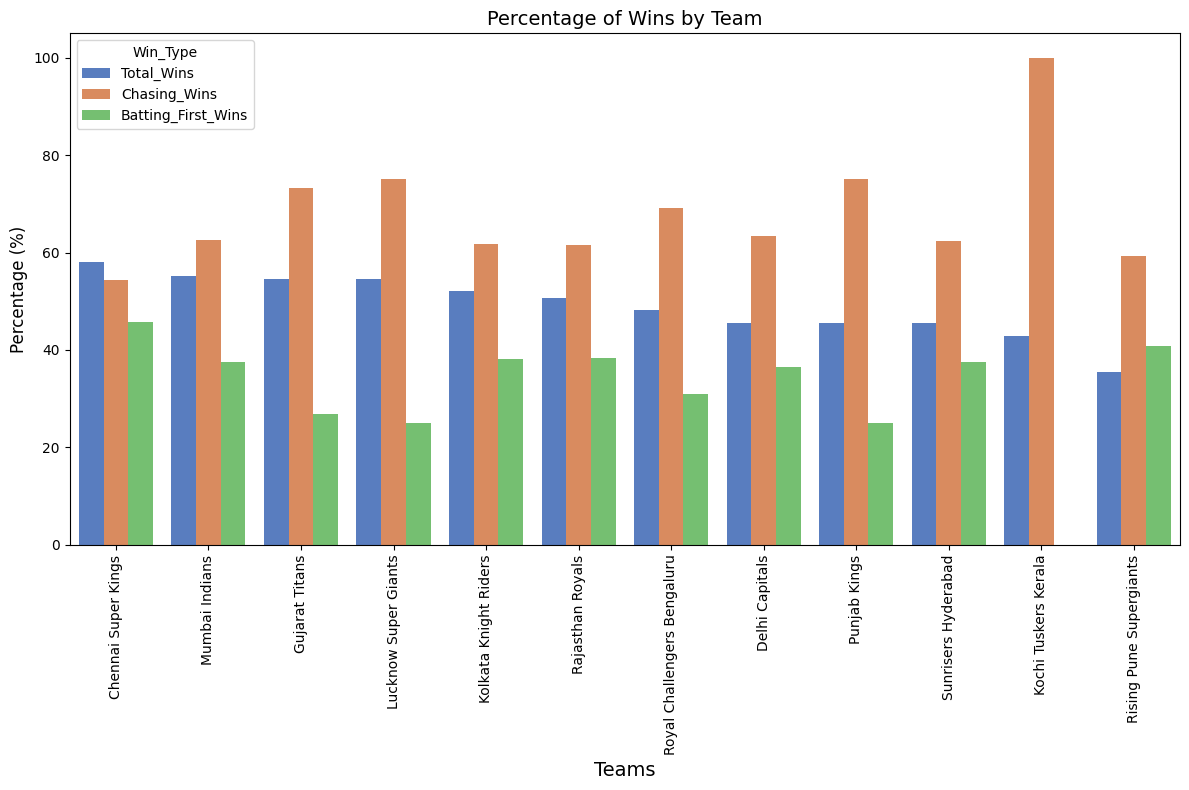

In [36]:
import seaborn as sns

# Melting the DataFrame for easier plotting
melted_df = percentage_df.sort_values(by='Total_Wins', ascending=False).melt(id_vars='Team', 
                                value_vars=['Total_Wins', 'Chasing_Wins', 'Batting_First_Wins'],
                                var_name='Win_Type', 
                                value_name='Percentage')

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df, x='Team', y='Percentage', hue='Win_Type', palette='muted')

# Adding labels and title
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Percentage of Wins by Team', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [37]:
every_team_win_data=match.groupby(['season','winner']).size().reset_index()
every_team_win_data.columns = ['Season', 'Winner','Total win']


In [38]:
MI_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Mumbai Indians'].style.background_gradient(cmap='coolwarm')
MI_HISTORY

In [39]:
RR_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Rajasthan Royals'].style.background_gradient(cmap='coolwarm')
RR_HISTORY

In [40]:
CSK_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Chennai Super Kings'].style.background_gradient(cmap='coolwarm')
CSK_HISTORY

In [41]:
RCB_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Royal Challengers Bengaluru'].style.background_gradient(cmap='coolwarm')
RCB_HISTORY

In [42]:
KKR_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Kolkata Knight Riders'].style.background_gradient(cmap='coolwarm')
KKR_HISTORY

In [43]:
plus200 = match[match['target_runs'] > 200].groupby('season').size().reset_index(name='times')
plus200

season  times
0    2008      7
1    2009      1
2    2010      5
3    2011      4
4    2012      4
5    2013      4
6    2014      5
7    2015      6
8    2016      5
9    2017      8
10   2018     11
11   2019      8
12   2020      9
13   2021      6
14   2022     13
15   2023     23
16   2024     26

In [44]:
Toss_data=match.value_counts('toss_winner').reset_index(name='Total Win').style.background_gradient(cmap='cividis')
Toss_data

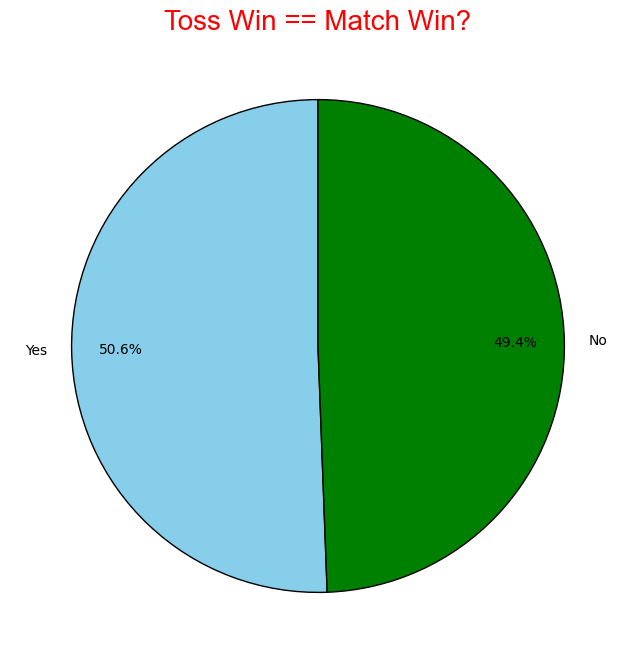

In [45]:
import numpy as np

match['toss_win == game_win'] = np.where(match['toss_winner'] == match['winner'], 'Yes', 'No')


import matplotlib.pyplot as plt

# Calculate the values and labels for the pie chart
values = match['toss_win == game_win'].value_counts()
labels = ["Yes", "No"]
colors = ['skyblue', 'green']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}, pctdistance=0.8)

# Add a title
plt.title('Toss Win == Match Win?', fontsize=20, fontfamily='Arial', color='red')

# Display the chart
plt.show()


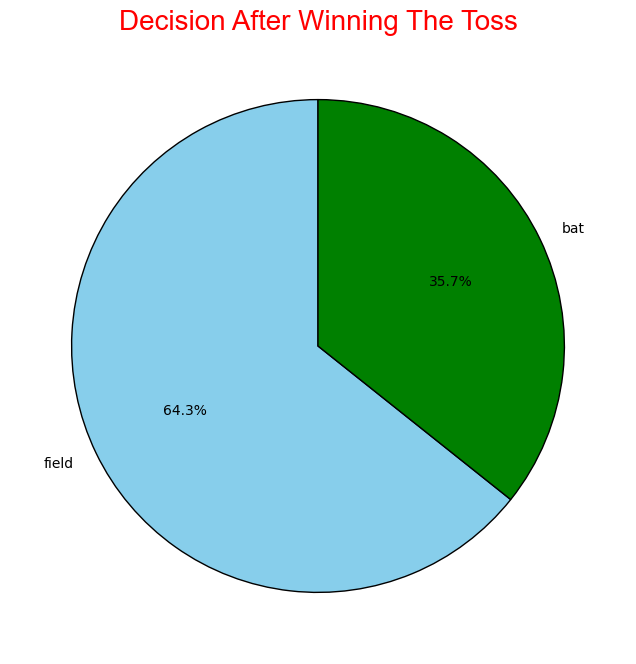

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the percentages for the pie chart
temp_series = match['toss_decision'].value_counts()
labels = np.array(temp_series.index)
values = np.array((temp_series / temp_series.sum()) * 100)
colors = ['skyblue', 'green']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)

# Add the title
plt.title(
    'Decision After Winning The Toss', 
    fontsize=20, 
    fontfamily='Arial', 
    color='red'
)

# Display the chart
plt.show()


In [47]:
# Team theme colors (customize as needed)
team_colors = {
    "Chennai Super Kings": "#F3D03E",
    "Delhi Capitals": "#0078B5",
    "Kolkata Knight Riders": "#3A225D",
    "Mumbai Indians": "#045093",
    "Punjab Kings": "#D71920",
    "Rajasthan Royals": "#EA1A92",
    "Royal Challengers Bengaluru": "#FF0000",
    "Sunrisers Hyderabad": "#F26A24",
    "Gujarat Titans": "#1C1F26",
    "Rising Pune Supergiants": "#800080",
    "Lucknow Super Giants": "#00A79D",
}


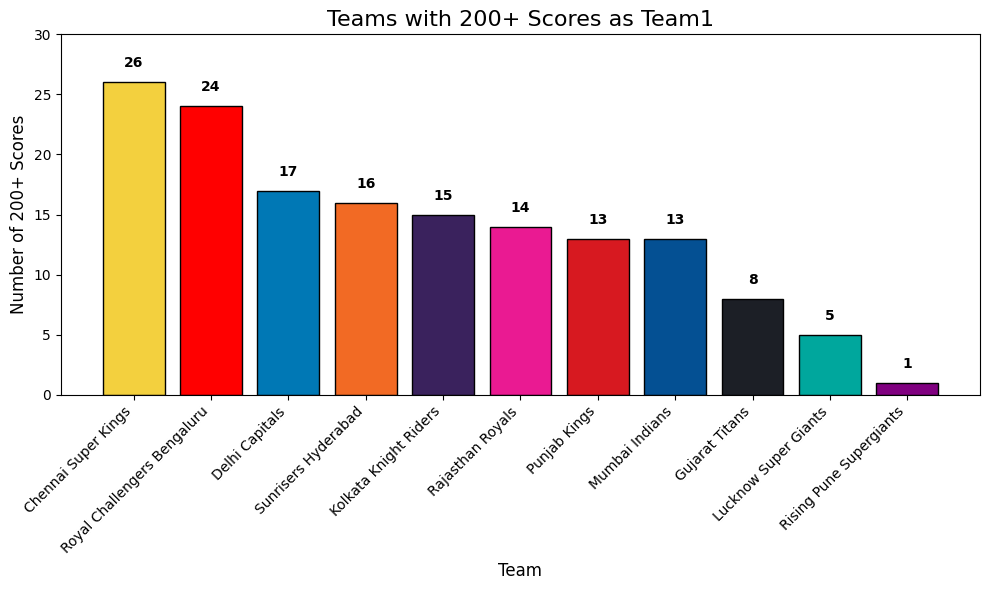

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for scores >= 200 in the 'target_runs' column
team1_200_scores = match[match['target_runs'] >= 200]['team1'].value_counts()

# Convert to a DataFrame for further processing
team1_200_scores_df = team1_200_scores.reset_index()
team1_200_scores_df.columns = ['Team', '200+ Scores']
team1_200_scores_df.sort_values(by='200+ Scores', ascending=False, inplace=True)

# Extract team names, scores, and colors
teams = team1_200_scores_df['Team']
scores = team1_200_scores_df['200+ Scores']
colors = [team_colors.get(team, '#808080') for team in teams]  # Default gray color if team not in dictionary

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(teams, scores, color=colors, edgecolor='black')

# Add exact values above the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Position the text slightly above the bar
             f"{score}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add titles and labels
plt.title('Teams with 200+ Scores as Team1', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of 200+ Scores', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0,30)

# Show the plot
plt.tight_layout()
plt.show()


In [49]:

# Find the highest score for each team
highest_scores = match.groupby('team1')['target_runs'].max().reset_index()
highest_scores.columns = ['Team', 'Highest Score']

# Correct for the +1 issue
highest_scores['Highest Score'] -= 1

# Convert scores to integers
highest_scores['Highest Score'] = highest_scores['Highest Score'].astype(int)

# Sort by highest score in descending order
highest_scores.sort_values(by='Highest Score', ascending=False, inplace=True)

# Extract team names, scores, and colors
teams = highest_scores['Team']
scores = highest_scores['Highest Score']
colors = [team_colors.get(team, '#808080') for team in teams]  # Default color if team not in dictionary

# Plot the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(teams, scores, color=colors, edgecolor='black')

# Add exact values above the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,  # Position the text slightly above the bar
             f"{score}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels and title
plt.title('Highest Scores of Each Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Highest Score', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0,350)

# Show the plot
plt.tight_layout()
plt.show()


In [50]:
import pandas as pd

# Filter for rows where scores are >= 200
team1_200_scores_by_season = match[match['target_runs'] >= 200]

# Group by season and team, and count the occurrences
grouped_data = team1_200_scores_by_season.groupby(['season', 'team1']).size().reset_index(name='200+ Scores')

# Pivot the table to get teams as rows and seasons as columns
pivot_table = grouped_data.pivot(index='team1', columns='season', values='200+ Scores')

# Fill NaN values with 0 and convert to integers
pivot_table = pivot_table.fillna(0).astype(int)

# Display the pivot table
pivot_table.head(15)
# print(pivot_table)


season                       2008  2009  2010  2011  2012  2013  2014  2015  \
team1                                                                         
Chennai Super Kings             2     0     1     1     1     1     2     1   
Delhi Capitals                  0     0     1     1     3     0     0     0   
Gujarat Titans                  0     0     0     0     0     0     0     0   
Kolkata Knight Riders           0     0     1     0     0     0     1     0   
Lucknow Super Giants            0     0     0     0     0     0     0     0   
Mumbai Indians                  0     0     1     0     0     1     0     2   
Punjab Kings                    2     1     0     1     0     0     1     0   
Rajasthan Royals                0     0     0     0     0     0     1     2   
Rising Pune Supergiants         0     0     0     0     0     0     0     0   
Royal Challengers Bengaluru     1     0     1     1     0     1     0     2   
Sunrisers Hyderabad             2     0     0     0     0     1     1     0   

season                       2016  2017  2018  2019  2020  2021  2022  2023  \
team1                                                                         
Chennai Super Kings             0     0     2     0     0     2     4     5   
Delhi Capitals                  0     2     1     1     1     0     2     1   
Gujarat Titans                  0     1     0     0     0     0     0     4   
Kolkata Knight Riders           0     0     3     2     0     0     0     2   
Lucknow Super Giants            0     0     0     0     0     0     2     1   
Mumbai Indians                  1     1     2     0     2     1     0     1   
Punjab Kings                    0     1     0     0     2     1     1     2   
Rajasthan Royals                0     0     1     0     1     1     3     5   
Rising Pune Supergiants         0     1     0     0     0     0     0     0   
Royal Challengers Bengaluru     4     0     2     3     1     1     2     2   
Sunrisers Hyderabad             0     2     0     2     2     0     0     2   

season                       2024  
team1                              
Chennai Super Kings             4  
Delhi Capitals                  4  
Gujarat Titans                  3  
Kolkata Knight Riders           6  
Lucknow Super Giants            2  
Mumbai Indians                  1  
Punjab Kings                    1  
Rajasthan Royals                0  
Rising Pune Supergiants         0  
Royal Challengers Bengaluru     3  
Sunrisers Hyderabad             4

In [51]:
import pandas as pd

# Filter for matches with super overs
super_overs = match[match['super_over'] == 'Y']

# Group by season to count super overs
season_wise_super_overs = super_overs.groupby('season').size().reset_index(name='Number of Super Overs')

# Select relevant columns for the detailed view
super_over_details = super_overs[['season', 'team1', 'team2', 'city']].reset_index(drop=True)

# Beautify the tables using pandas styling
styled_season_table = season_wise_super_overs.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
     {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}]
).set_caption("Season-wise Super Overs Count")

styled_details_table = super_over_details.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
     {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}]
).set_caption("Details of Matches with Super Overs")

# Display the tables
styled_season_table



In [52]:
styled_details_table

In [53]:
import pandas as pd

# Filter for matches where the result was by runs
big_wins = match[match['result'] == 'runs']

# Sort by result_margin in descending order
top_20_biggest_wins = big_wins.nlargest(20, 'result_margin')

# Add a column for first innings score
top_20_biggest_wins['First Innings Score'] = top_20_biggest_wins['target_runs'] - 1

# Select relevant columns: winner (team1), loser (team2), city, season, result_margin, and first innings score
top_20_details = top_20_biggest_wins[['season', 'team1', 'team2', 'city', 'result_margin', 'First Innings Score']].copy()

# Rename columns for better readability
top_20_details.rename(columns={
    'team1': 'Winner',
    'team2': 'Loser',
    'result_margin': 'Margin (Runs)'
}, inplace=True)

# Ensure Margin (Runs) is an integer
top_20_details['Margin (Runs)'] = top_20_details['Margin (Runs)'].astype(int)

# Beautify the table using pandas styling
styled_table = top_20_details.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Top 10 Biggest Wins by Runs in IPL")

# Display the styled table
styled_table


In [54]:
import pandas as pd

# Filter matches where the method was "D/L"
dl_matches = match[match['method'] == 'D/L']

# Select relevant columns: season, city, team1, team2, and winner
dl_details = dl_matches[['season', 'city', 'team1', 'team2', 'winner']].copy()

# Rename columns for better readability
dl_details.rename(columns={
    'season': 'Season',
    'city': 'City',
    'team1': 'Team1',
    'team2': 'Team2',
    'winner': 'Winner'
}, inplace=True)

# Sort by season for better organization
dl_details.sort_values(by='Season', inplace=True)

# Beautify the table using pandas styling
styled_table = dl_details.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Matches Conducted Using Duckworth-Lewis Method (D/L)")

# Display the styled table
styled_table


In [55]:
import pandas as pd

# Count the number of times each player has won the 'Player of the Match'
player_awards = match['player_of_match'].value_counts().reset_index()

# Rename columns for clarity
player_awards.columns = ['Player', 'Awards']

# Get the top 10 players with the most awards
top_20_players = player_awards.head(20)

# Beautify the table using pandas styling
styled_table = top_20_players.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Top 20 Players with Most 'Player of the Match' Awards")

# Display the styled table
styled_table


In [56]:
import pandas as pd

# Combine umpire1 and umpire2 columns into a single Series
all_umpires = pd.concat([match['umpire1'], match['umpire2']])

# Count the number of matches each umpire participated in
umpire_counts = all_umpires.value_counts().reset_index()

# Rename columns for clarity
umpire_counts.columns = ['Umpire', 'Matches Umpired']

# Exclude any NaN values (if present)
umpire_counts.dropna(inplace=True)

# Get the top 10 umpires
top_umpires = umpire_counts.head(20)

# Beautify the table using pandas styling
styled_table = top_umpires.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Top 20 Umpires with Most IPL Matches")

# Display the styled table
styled_table


In [57]:
import pandas as pd

# Count the number of tosses won by each team
toss_wins = match['toss_winner'].value_counts().reset_index()

# Rename columns for clarity
toss_wins.columns = ['Team', 'Tosses Won']

# Sort the teams by the number of tosses won in descending order
toss_wins_sorted = toss_wins.sort_values(by='Tosses Won', ascending=False)

# Beautify the table using pandas styling
styled_table = toss_wins_sorted.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Teams with Most Tosses Won in IPL History (2008-2024)")

# Display the styled table
styled_table


In [58]:
import pandas as pd

# Filter the matches for match_type == 'final'
final_matches = match[match['match_type'] == 'Final'][['date', 'city', 'team1', 'team2', 'winner']]

# Sort the results by date
final_matches_sorted = final_matches.sort_values(by='date')

# Beautify the table using pandas styling
styled_table = final_matches_sorted.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("IPL Final Games Details")

# Display the styled table
styled_table


# NOW TIME FOR INDIVIDUAL PLAYER STATS ...

In [59]:
import pandas as pd


# Calculate total runs scored by each player
player_runs = deliv[['batter', 'batsman_runs']]
player_runs = player_runs.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')

# Calculate the number of matches played by each player
player_matches = deliv[['batter', 'match_id']].drop_duplicates()
player_matches = player_matches.groupby('batter')['match_id'].nunique().reset_index(name='matches_played')

# Merge runs and matches data
player_stats = pd.merge(player_runs, player_matches, on='batter')

# Sort players by total runs and take the top 20
top_20_players = player_stats.sort_values(by='total_runs', ascending=False).head(20)

# Reset index for better readability
top_20_players.reset_index(drop=True, inplace=True)

# Display top 20 players with total runs and matches played
top_20_players.head(20)




batter  total_runs  matches_played
0          V Kohli        8014             244
1         S Dhawan        6769             221
2        RG Sharma        6630             251
3        DA Warner        6567             184
4         SK Raina        5536             200
5         MS Dhoni        5243             228
6   AB de Villiers        5181             170
7         CH Gayle        4997             141
8       RV Uthappa        4954             197
9       KD Karthik        4843             233
10        KL Rahul        4689             122
11       AM Rahane        4642             171
12    F du Plessis        4571             138
13       SV Samson        4419             162
14       AT Rayudu        4348             185
15       G Gambhir        4217             151
16       SR Watson        3880             141
17       MK Pandey        3859             158
18        SA Yadav        3594             135
19      JC Buttler        3583             106

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the data
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(
    data=top_20_players, 
    x='batter', 
    y='total_runs', 
    palette='viridis'
)

# Adding text for matches played above bars
for i, row in top_20_players.iterrows():
    plt.text(i, row['total_runs'] + 50, f"{row['matches_played']}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adding titles and labels
plt.title('Top 20 All-Time Run Scorers in IPL', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and count the number of sixes hit by each player
most_sixes = deliv[deliv['batsman_runs'] == 6]['batter'].value_counts().head(20)
most_sixes_df = most_sixes.reset_index()
most_sixes_df.columns = ['batter', 'sixes']

# Plotting the data
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(data=most_sixes_df, x='batter', y='sixes', palette='magma')

# Adding the number of sixes above each bar
for index, row in most_sixes_df.iterrows():
    bar_plot.text(index, row.sixes + 1, row.sixes, color='black', ha="center", fontsize=10, fontweight='bold')

# Adding titles and labels
plt.title('Top 20 Players with Most Sixes in IPL History', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Sixes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


In [62]:
# Filter and count the number of fours hit by each player
most_fours = deliv[deliv['batsman_runs'] == 4]['batter'].value_counts().head(20)
most_fours_df = most_fours.reset_index()
most_fours_df.columns = ['batter', 'fours']

# Plotting the data
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(data=most_fours_df, x='batter', y='fours', palette='Blues')

# Adding the number of fours above each bar
for index, row in most_fours_df.iterrows():
    bar_plot.text(index, row.fours + 1, row.fours, color='black', ha="center", fontsize=10, fontweight='bold')

# Adding titles and labels
plt.title('Top 20 Players with Most Fours in IPL History', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Fours', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


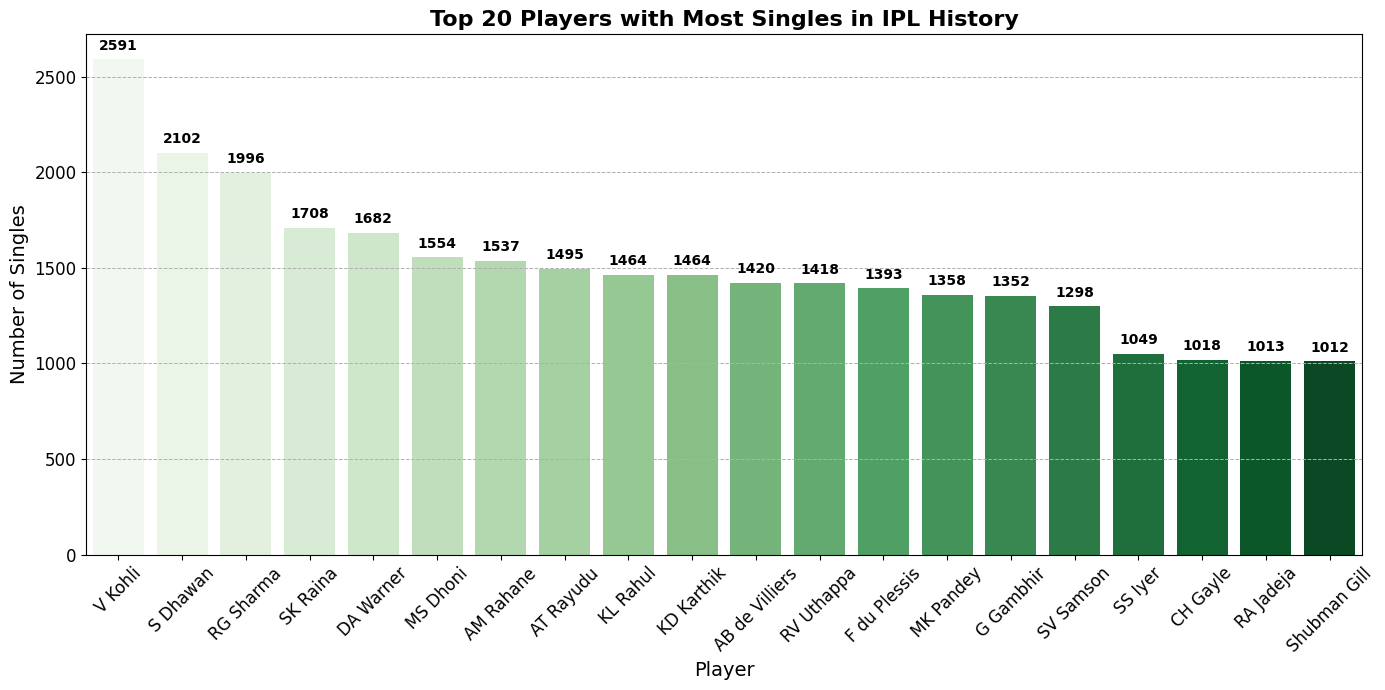

In [63]:
# Filter and count the number of singles taken by each player
most_singles = deliv[deliv['batsman_runs'] == 1]['batter'].value_counts().head(20)
most_singles_df = most_singles.reset_index()
most_singles_df.columns = ['batter', 'singles']

# Plotting the data
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(data=most_singles_df, x='batter', y='singles', palette='Greens')

# Adding the number of singles above each bar
for index, row in most_singles_df.iterrows():
    bar_plot.text(index, row.singles + 50, row.singles, color='black', ha="center", fontsize=10, fontweight='bold')

# Adding titles and labels
plt.title('Top 20 Players with Most Singles in IPL History', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Singles', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


In [64]:
# Filter and count the number of doubles taken by each player
most_doubles = deliv[deliv['batsman_runs'] == 2]['batter'].value_counts().head(20)
most_doubles_df = most_doubles.reset_index()
most_doubles_df.columns = ['batter', 'doubles']

# Plotting the data
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(data=most_doubles_df, x='batter', y='doubles', palette='Purples')

# Adding the number of doubles above each bar
for index, row in most_doubles_df.iterrows():
    bar_plot.text(index, row.doubles + 5, row.doubles, color='black', ha="center", fontsize=10, fontweight='bold')

# Adding titles and labels
plt.title('Top 20 Players with Most Doubles in IPL History', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Doubles', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


In [65]:
# Filter and count the number of triples taken by each player
most_triples = deliv[deliv['batsman_runs'] == 3]['batter'].value_counts().head(20)
most_triples_df = most_triples.reset_index()
most_triples_df.columns = ['batter', 'triples']

# Plotting the data
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(data=most_triples_df, x='batter', y='triples', palette='Oranges')

# Adding the number of triples above each bar
for index, row in most_triples_df.iterrows():
    bar_plot.text(index, row.triples + 1, row.triples, color='black', ha="center", fontsize=10, fontweight='bold')

# Adding titles and labels
plt.title('Top 20 Players with Most Triples in IPL History', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Triples', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.ylim(0,30)

plt.tight_layout()
plt.show()


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for players who are out (is_wicket = 1)
outs = deliv[deliv['is_wicket'] == 1]['batter'].value_counts().head(20).reset_index()
outs.columns = ['batter', 'total_outs']

# Calculate total runs scored by each player
total_runs = deliv.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')

# Calculate total matches played by each player
total_matches = deliv.groupby('batter')['match_id'].nunique().reset_index(name='total_matches')

# Merge data
batter_stats = outs.merge(total_runs, on='batter').merge(total_matches, on='batter')

# Calculate not outs
batter_stats['not_outs'] = batter_stats['total_matches'] - batter_stats['total_outs']

# Calculate averages
batter_stats['average1'] = batter_stats['total_runs'] / batter_stats['total_outs']
batter_stats['average2'] = batter_stats['total_runs'] / batter_stats['total_matches']

# Sort for top 20 players
batter_stats = batter_stats.sort_values(by='total_outs', ascending=False).head(20)

# Final table
# print(batter_stats[['batter', 'total_outs', 'total_matches', 'total_runs', 'not_outs', 'average1', 'average2']])
batter_stats[['batter', 'total_outs', 'total_matches', 'total_runs', 'not_outs', 'average1', 'average2']].head(20)





batter  total_outs  total_matches  total_runs  not_outs  \
0        RG Sharma         232            251        6630        19   
1          V Kohli         218            244        8014        26   
2         S Dhawan         194            221        6769        27   
3       KD Karthik         189            233        4843        44   
4       RV Uthappa         184            197        4954        13   
5         SK Raina         168            200        5536        32   
6        DA Warner         164            184        6567        20   
7        AM Rahane         156            171        4642        15   
8        AT Rayudu         152            185        4348        33   
9         MS Dhoni         149            228        5243        79   
10       SV Samson         142            162        4419        20   
11       G Gambhir         135            151        4217        16   
12       MK Pandey         133            158        3859        25   
13      KA Pollard         129            168        3437        39   
14        CH Gayle         128            141        4997        13   
15        PA Patel         127            136        2848         9   
16       SR Watson         126            141        3880        15   
17  AB de Villiers         125            170        5181        45   
18    F du Plessis         125            138        4571        13   
19         WP Saha         121            143        2934        22   

     average1   average2  
0   28.577586  26.414343  
1   36.761468  32.844262  
2   34.891753  30.628959  
3   25.624339  20.785408  
4   26.923913  25.147208  
5   32.952381  27.680000  
6   40.042683  35.690217  
7   29.756410  27.146199  
8   28.605263  23.502703  
9   35.187919  22.995614  
10  31.119718  27.277778  
11  31.237037  27.927152  
12  29.015038  24.424051  
13  26.643411  20.458333  
14  39.039062  35.439716  
15  22.425197  20.941176  
16  30.793651  27.517730  
17  41.448000  30.476471  
18  36.568000  33.123188  
19  24.247934  20.517483

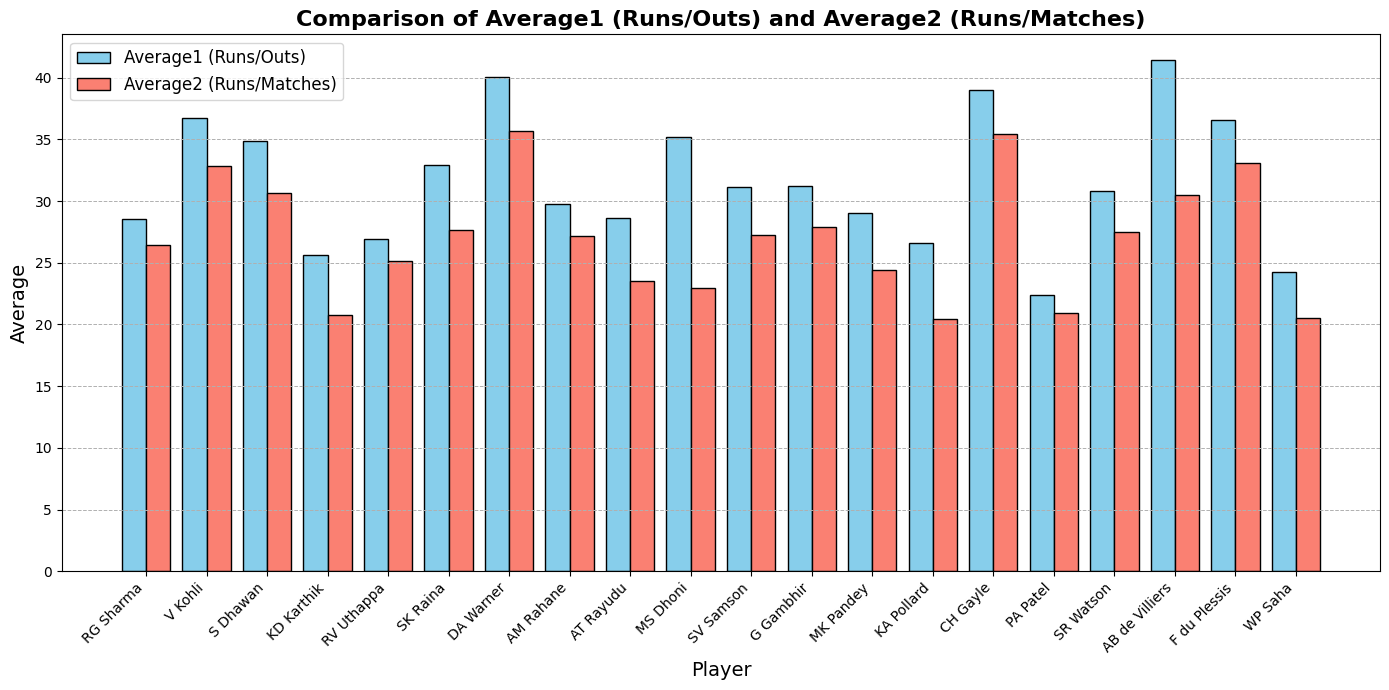

In [67]:
# Plotting the averages
plt.figure(figsize=(14, 7))
bar_width = 0.4
indices = range(len(batter_stats))

# Bar plot for Average1
plt.bar([i - bar_width / 2 for i in indices], batter_stats['average1'], width=bar_width, label='Average1 (Runs/Outs)', color='skyblue', edgecolor='black')

# Bar plot for Average2
plt.bar([i + bar_width / 2 for i in indices], batter_stats['average2'], width=bar_width, label='Average2 (Runs/Matches)', color='salmon', edgecolor='black')

# Adding player names to x-axis
plt.xticks(indices, batter_stats['batter'], rotation=45, ha='right', fontsize=10)

# Adding labels, title, and legend
plt.title('Comparison of Average1 (Runs/Outs) and Average2 (Runs/Matches)', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# POWERPLAY STATS

In [68]:
# Filter for deliveries in powerplay overs
powerplay_deliveries = deliv[(deliv['over'] >= 0) & (deliv['over'] <= 5)]

# Calculate total runs scored in powerplay
most_runs_pp = powerplay_deliveries.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')
most_runs_pp = most_runs_pp.sort_values(by='total_runs', ascending=False).head(20)

# Print the result
most_runs_pp.head(20)


batter  total_runs
272      S Dhawan        3415
76      DA Warner        3318
337       V Kohli        2809
67       CH Gayle        2405
30      AM Rahane        2319
103     G Gambhir        2277
101  F du Plessis        2148
254     RG Sharma        2137
266    RV Uthappa        2037
150      KL Rahul        2010
227      PA Patel        1904
239     Q de Kock        1843
126    JC Buttler        1613
338      V Sehwag        1593
176       M Vijay        1574
288      SK Raina        1560
53    BB McCullum        1557
317  Shubman Gill        1432
301     SR Watson        1421
178    MA Agarwal        1389

In [69]:
# Filter for sixes in powerplay
most_sixes_pp = powerplay_deliveries[powerplay_deliveries['batsman_runs'] == 6]['batter'].value_counts().head(20).reset_index()
most_sixes_pp.columns = ['batter', 'total_sixes']

# Print the result
most_sixes_pp.head(20)


batter  total_sixes
0       CH Gayle          145
1      DA Warner          105
2      RG Sharma           94
3       KL Rahul           77
4       S Dhawan           76
5   F du Plessis           76
6      Q de Kock           75
7    BB McCullum           70
8        V Kohli           68
9     JC Buttler           65
10     SP Narine           55
11      SK Raina           55
12     SR Watson           54
13  Ishan Kishan           50
14    RV Uthappa           50
15  AC Gilchrist           49
16     AM Rahane           49
17      DR Smith           47
18       M Vijay           46
19      V Sehwag           46

In [70]:
# Filter for fours in powerplay
most_fours_pp = powerplay_deliveries[powerplay_deliveries['batsman_runs'] == 4]['batter'].value_counts().head(20).reset_index()
most_fours_pp.columns = ['batter', 'total_fours']

# Print the result
most_fours_pp.head(20)


batter  total_fours
0       S Dhawan          455
1      DA Warner          432
2        V Kohli          348
3      G Gambhir          310
4      AM Rahane          302
5       PA Patel          283
6   F du Plessis          268
7       CH Gayle          267
8     RV Uthappa          261
9      RG Sharma          240
10      V Sehwag          230
11      KL Rahul          216
12    JC Buttler          207
13     Q de Kock          206
14      SK Raina          198
15       PP Shaw          193
16       WP Saha          191
17  AC Gilchrist          191
18  Shubman Gill          188
19   BB McCullum          184

In [71]:
# Count total balls faced in powerplay
balls_played_pp = powerplay_deliveries.groupby('batter')['ball'].count().reset_index(name='balls_faced')
balls_played_pp = balls_played_pp.sort_values(by='balls_faced', ascending=False).head(20)

# Print the result
balls_played_pp.head(21)


batter  balls_faced
272      S Dhawan         2862
76      DA Warner         2501
337       V Kohli         2347
30      AM Rahane         2013
103     G Gambhir         1945
67       CH Gayle         1851
254     RG Sharma         1800
266    RV Uthappa         1697
150      KL Rahul         1640
227      PA Patel         1630
101  F du Plessis         1597
239     Q de Kock         1438
176       M Vijay         1416
301     SR Watson         1292
53    BB McCullum         1278
288      SK Raina         1210
126    JC Buttler         1189
178    MA Agarwal         1183
338      V Sehwag         1160
317  Shubman Gill         1142

              batter  total_runs  balls_faced  strike_rate
331          TM Head         412          211   195.260664
232          PD Salt         404          242   166.942149
298        SP Narine         946          577   163.951473
40   Abhishek Sharma         758          501   151.297405
354      YBK Jaiswal        1009          677   149.039882
133      JM Bairstow         864          606   142.574257
226   P Simran Singh         499          350   142.571429
237          PP Shaw        1347          946   142.389006
355        YK Pathan         361          256   141.015625
98           E Lewis         420          298   140.939597
65           CA Lynn         779          553   140.867993
338         V Sehwag        1593         1160   137.327586
280         SA Yadav         859          628   136.783439
250      RA Tripathi         977          716   136.452514
108       GJ Maxwell         433          318   136.163522
126       JC Buttler        1613         1189   135.6602

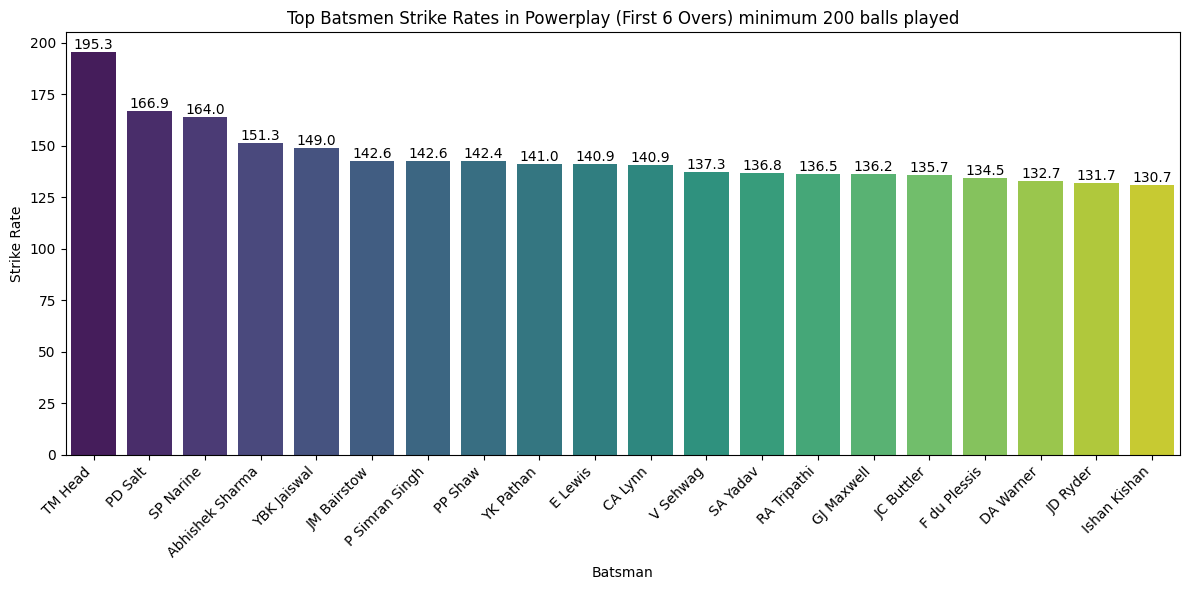

In [72]:
# Calculate strike rate in powerplay
strike_rate_pp = powerplay_deliveries.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()
strike_rate_pp.columns = ['batter', 'total_runs', 'balls_faced']

strike_rate_pp = strike_rate_pp[strike_rate_pp['balls_faced'] >= 200]

# Add strike rate column
strike_rate_pp['strike_rate'] = (strike_rate_pp['total_runs'] / strike_rate_pp['balls_faced']) * 100

# Sort by strike rate and get top 20
strike_rate_pp = strike_rate_pp.sort_values(by='strike_rate', ascending=False).head(20)

# Print the result
print(strike_rate_pp[['batter', 'total_runs', 'balls_faced', 'strike_rate']])




#Plotting Graph 
plt.figure(figsize=(12, 6))
sns.barplot(data=strike_rate_pp, x='batter', y='strike_rate', palette='viridis')
plt.title('Top Batsmen Strike Rates in Powerplay (First 6 Overs) minimum 200 balls played')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45, ha='right')

# Adding values on top of bars
for index, value in enumerate(strike_rate_pp['strike_rate']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [73]:
# Calculate strike rate in powerplay
strike_rate_pp_500 = powerplay_deliveries.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()
strike_rate_pp_500.columns = ['batter', 'total_runs', 'balls_faced']

strike_rate_pp_500 = strike_rate_pp_500[strike_rate_pp_500['balls_faced'] >= 500]

# Add strike rate column
strike_rate_pp_500['strike_rate'] = (strike_rate_pp_500['total_runs'] / strike_rate_pp_500['balls_faced']) * 100

# Sort by strike rate and get top 20
strike_rate_pp_500 = strike_rate_pp_500.sort_values(by='strike_rate', ascending=False).head(20)

# Print the result
strike_rate_pp_500[['batter', 'total_runs', 'balls_faced', 'strike_rate']].head(21)

batter  total_runs  balls_faced  strike_rate
298        SP Narine         946          577   163.951473
40   Abhishek Sharma         758          501   151.297405
354      YBK Jaiswal        1009          677   149.039882
133      JM Bairstow         864          606   142.574257
237          PP Shaw        1347          946   142.389006
65           CA Lynn         779          553   140.867993
338         V Sehwag        1593         1160   137.327586
280         SA Yadav         859          628   136.783439
250      RA Tripathi         977          716   136.452514
126       JC Buttler        1613         1189   135.660219
101     F du Plessis        2148         1597   134.502192
76         DA Warner        3318         2501   132.666933
120     Ishan Kishan        1251          957   130.721003
67          CH Gayle        2405         1851   129.929768
288         SK Raina        1560         1210   128.925620
349          WP Saha        1389         1081   128.492137
18      AC Gilchrist        1385         1080   128.240741
239        Q de Kock        1843         1438   128.164117
317     Shubman Gill        1432         1142   125.394046
251       RD Gaikwad        1128          918   122.875817

In [74]:
#Plotting Graph 
plt.figure(figsize=(12, 6))
sns.barplot(data=strike_rate_pp_500, x='batter', y='strike_rate', palette='viridis')
plt.title('Top Batsmen Strike Rates in Powerplay (First 6 Overs) minimum 500 balls played')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45, ha='right')

# Adding values on top of bars
for index, value in enumerate(strike_rate_pp_500['strike_rate']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [75]:
# Calculate strike rate in powerplay
strike_rate_pp_500_low_to_high = powerplay_deliveries.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()
strike_rate_pp_500_low_to_high.columns = ['batter', 'total_runs', 'balls_faced']

strike_rate_pp_500_low_to_high = strike_rate_pp_500_low_to_high[strike_rate_pp_500_low_to_high['balls_faced'] >= 500]

# Add strike rate column
strike_rate_pp_500_low_to_high['strike_rate'] = (strike_rate_pp_500_low_to_high['total_runs'] / strike_rate_pp_500_low_to_high['balls_faced']) * 100

# Sort by strike rate and get top 20
strike_rate_pp_500_low_to_high = strike_rate_pp_500_low_to_high.sort_values(by='strike_rate', ascending=True).head(20)

# Print the result
strike_rate_pp_500_low_to_high[['batter', 'total_runs', 'balls_faced', 'strike_rate']].head(21)

batter  total_runs  balls_faced  strike_rate
282        SC Ganguly         529          540    97.962963
219           NV Ojha         494          503    98.210736
130         JH Kallis        1036         1024   101.171875
286          SE Marsh         779          753   103.452855
37          AT Rayudu         777          750   103.600000
184        MEK Hussey         828          791   104.677623
302           SS Iyer         880          835   105.389222
242          R Dravid         905          855   105.847953
301         SR Watson        1421         1292   109.984520
26           AJ Finch         911          826   110.290557
192         MK Pandey        1133         1027   110.321324
300      SR Tendulkar        1143         1035   110.434783
176           M Vijay        1574         1416   111.158192
205     Mandeep Singh         633          569   111.247803
212            N Rana         649          567   114.462081
30          AM Rahane        2319         2013   115.201192
227          PA Patel        1904         1630   116.809816
103         G Gambhir        2277         1945   117.069409
91   DPMD Jayawardene         611          521   117.274472
178        MA Agarwal        1389         1183   117.413356

In [76]:
#Plotting Graph 
plt.figure(figsize=(12, 6))
sns.barplot(data=strike_rate_pp_500_low_to_high, x='batter', y='strike_rate', palette='viridis')
plt.title('Lowest Batsmen Strike Rates in Powerplay (First 6 Overs) minimum 500 balls played')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45, ha='right')

# Adding values on top of bars
for index, value in enumerate(strike_rate_pp_500_low_to_high['strike_rate']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Death Overs Stat  

In [77]:
# Count total balls faced in death overs
balls_played_death = death_overs.groupby('batter')['ball'].count().reset_index(name='balls_faced')
balls_played_death = balls_played_death.sort_values(by='balls_faced', ascending=False).head(20)

balls_played_death.head(21)


NameError: name 'death_overs' is not defined

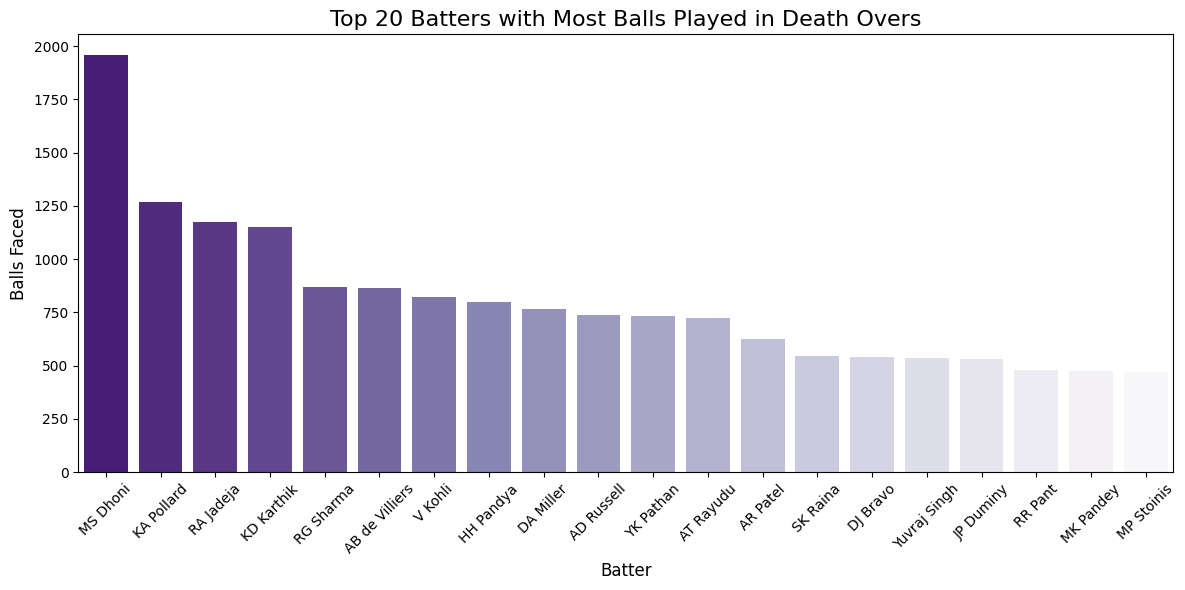

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=balls_played_death, x='batter', y='balls_faced', palette='Purples_r')
plt.title('Top 20 Batters with Most Balls Played in Death Overs', fontsize=16)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Balls Faced', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Filter for deliveries in death overs
death_overs = deliv[(deliv['over'] >= 15) & (deliv['over'] <= 19)]

# Calculate total runs scored in death overs
most_runs_death = death_overs.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')
most_runs_death = most_runs_death.sort_values(by='total_runs', ascending=False).head(20)

most_runs_death.head(20)




batter  total_runs
337        MS Dhoni        3292
250      KA Pollard        2032
255      KD Karthik        1904
27   AB de Villiers        1868
425       RA Jadeja        1680
431       RG Sharma        1513
567         V Kohli        1469
34       AD Russell        1324
130       DA Miller        1298
190       HH Pandya        1290
57        AT Rayudu        1179
594       YK Pathan        1126
444         RR Pant         923
138        DJ Bravo         909
600    Yuvraj Singh         906
50         AR Patel         900
492        SK Raina         899
234       JP Duminy         882
503      SO Hetmyer         791
515       SV Samson         780

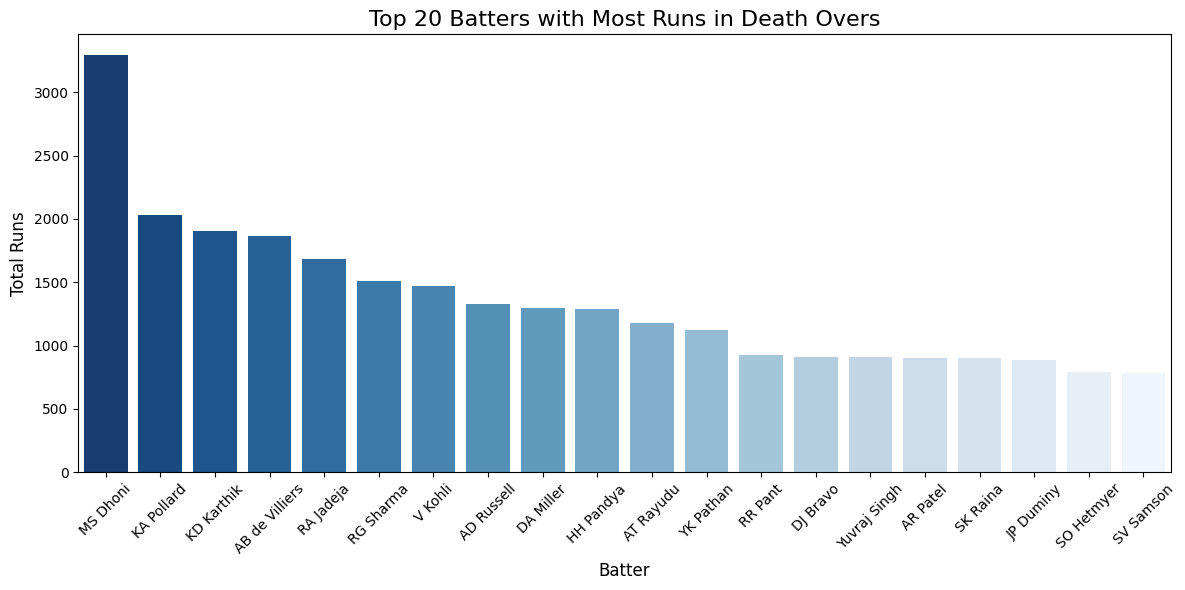

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=most_runs_death, x='batter', y='total_runs', palette='Blues_r')
plt.title('Top 20 Batters with Most Runs in Death Overs', fontsize=16)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate strike rate in death overs
strike_rate_death = death_overs.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()
strike_rate_death.columns = ['batter', 'total_runs', 'balls_faced']

strike_rate_death=strike_rate_death[strike_rate_death['balls_faced'] >= 200]

# Add strike rate column
strike_rate_death['strike_rate'] = (strike_rate_death['total_runs'] / strike_rate_death['balls_faced']) * 100

# Sort by strike rate and get top 20
strike_rate_death = strike_rate_death.sort_values(by='strike_rate', ascending=False).head(20)

strike_rate_death.head(20)




batter  total_runs  balls_faced  strike_rate
27   AB de Villiers        1868          867   215.455594
444         RR Pant         923          480   192.291667
109        CH Gayle         581          304   191.118421
217      JC Buttler         596          319   186.833856
185       H Klaasen         403          219   184.018265
515       SV Samson         780          430   181.395349
509       SR Watson         453          251   180.478088
34       AD Russell        1324          739   179.161028
567         V Kohli        1469          824   178.276699
551        TH David         540          308   175.324675
140       DJ Hussey         410          234   175.213675
180      GJ Maxwell         599          343   174.635569
431       RG Sharma        1513          868   174.308756
478        SA Yadav         694          401   173.067332
131       DA Warner         628          363   173.002755
165    F du Plessis         568          331   171.601208
224       JH Kallis         394          231   170.562771
438        RK Singh         499          294   169.727891
496       SM Curran         424          250   169.600000
503      SO Hetmyer         791          467   169.379015

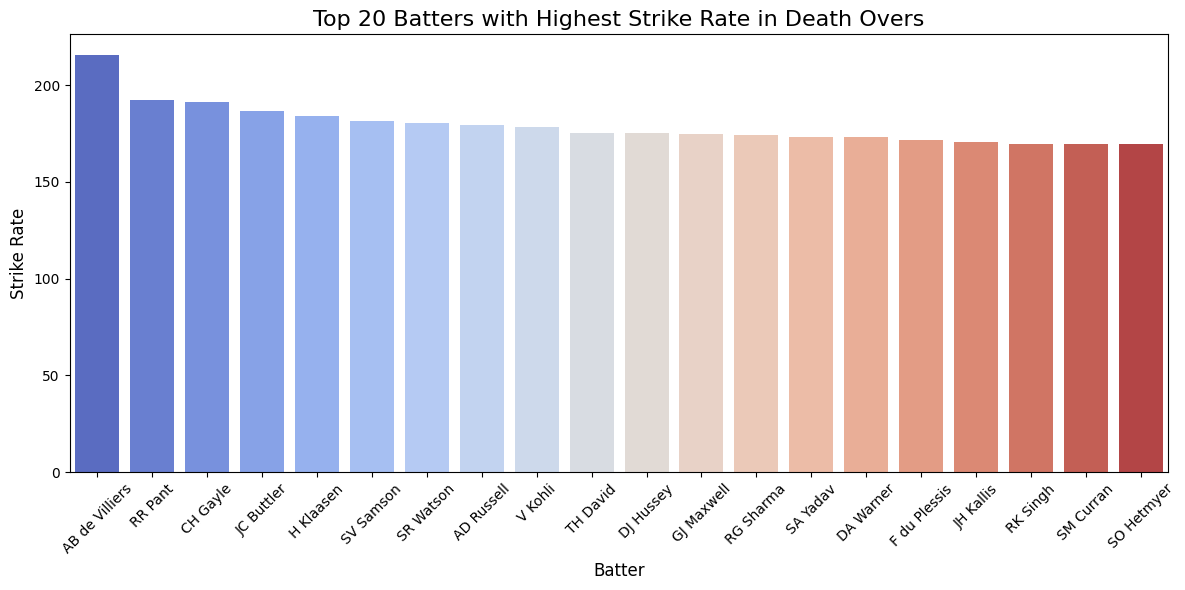

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=strike_rate_death, x='batter', y='strike_rate', palette='coolwarm')
plt.title('Top 20 Batters with Highest Strike Rate in Death Overs', fontsize=16)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Filter for sixes in death overs
most_sixes_death = death_overs[death_overs['batsman_runs'] == 6]['batter'].value_counts().head(20).reset_index()
most_sixes_death.columns = ['batter', 'total_sixes']

most_sixes_death.head(21)




batter  total_sixes
0         MS Dhoni          196
1       KA Pollard          144
2   AB de Villiers          140
3       AD Russell          118
4       KD Karthik           99
5        RG Sharma           91
6          V Kohli           88
7        HH Pandya           87
8        DA Miller           80
9        RA Jadeja           75
10    Yuvraj Singh           68
11         RR Pant           67
12       AT Rayudu           66
13      SO Hetmyer           58
14       YK Pathan           56
15       SV Samson           53
16        DJ Bravo           50
17        N Pooran           50
18        CH Gayle           50
19        AR Patel           49

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=most_sixes_death, x='batter', y='total_sixes', palette='magma')
plt.title('Top 20 Batters with Most Sixes in Death Overs', fontsize=16)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Total Sixes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Filter for fours in death overs
most_fours_death = death_overs[death_overs['batsman_runs'] == 4]['batter'].value_counts().head(20).reset_index()
most_fours_death.columns = ['batter', 'total_fours']

most_fours_death.head(21)



batter  total_fours
0         MS Dhoni          241
1       KD Karthik          171
2   AB de Villiers          135
3       KA Pollard          129
4        RG Sharma          127
5        RA Jadeja          122
6          V Kohli          108
7        YK Pathan           93
8       AD Russell           89
9        AT Rayudu           89
10       HH Pandya           88
11       DA Miller           88
12         RR Pant           77
13        SA Yadav           73
14        S Dhawan           69
15        SK Raina           68
16        DJ Bravo           63
17       SPD Smith           63
18      MP Stoinis           62
19    Yuvraj Singh           62

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=most_fours_death, x='batter', y='total_fours', palette='viridis')
plt.title('Top 20 Batters with Most Fours in Death Overs', fontsize=16)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Total Fours', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


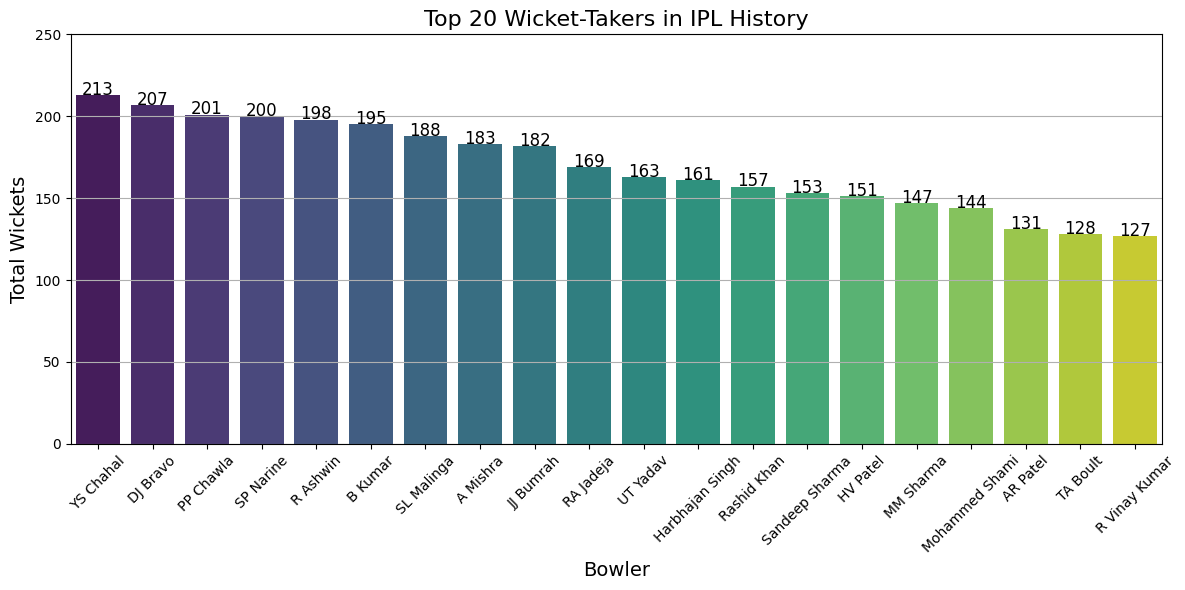

In [ ]:
most_wicket_taker = deliv[['bowler', 'is_wicket']]
most_wicket_taker = most_wicket_taker.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wicket')
most_wicket_taker = most_wicket_taker.sort_values(by='total_wicket', ascending=False).reset_index(drop=True)

#top 10 wicket-takers
top_wicket_takers = most_wicket_taker.head(20)

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_wicket_takers, x='bowler', y='total_wicket', palette='viridis')

# Annotate the bars with total wickets
for index, row in top_wicket_takers.iterrows():
    bar_plot.text(index, row.total_wicket + 0.1, row.total_wicket, color='black', ha="center", fontsize=12)

# Adding titles and labels
plt.title('Top 20 Wicket-Takers in IPL History', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(0,250)
plt.tight_layout()
plt.show()

In [ ]:
#Calculating total runs conceded by each bowler
runs_conceded = deliv.groupby('bowler')['batsman_runs'].sum().reset_index(name='runs_conceded')

#Filtering out wides and no balls and calculating total overs bowled by each bowler
#Only counting legitimate deliveries - excluding wides and no balls
valid_deliveries = deliv[~deliv['extras_type'].isin(['wides', 'noballs'])]

# Counting the number of balls bowled for valid deliveries
balls_bowled = valid_deliveries.groupby('bowler')['ball'].count().reset_index(name='balls_bowled')
balls_bowled['overs_bowled'] = balls_bowled['balls_bowled'] / 6

#Merging runs conceded and balls bowled data
bowler_stats = pd.merge(runs_conceded, balls_bowled[['bowler', 'overs_bowled']], on='bowler', how='left')

#Calculating the economy rate
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / bowler_stats['overs_bowled']

#filtring data for those have minimum over bowled 60 for fare comparision 
bowler_stats = bowler_stats[bowler_stats['overs_bowled']>=100]
#Sorting the bowlers by economy rate
most_economical_bowlers = bowler_stats.sort_values(by='economy_rate').reset_index(drop=True)

# Displaying the top bowlers with lowest economy rates
top_20_most_economical_bowlers = most_economical_bowlers.head(20)

# Display the result
top_20_most_economical_bowlers.style.set_table_attributes('style="background-color: black;"').set_properties(**{'background-color': 'black'})





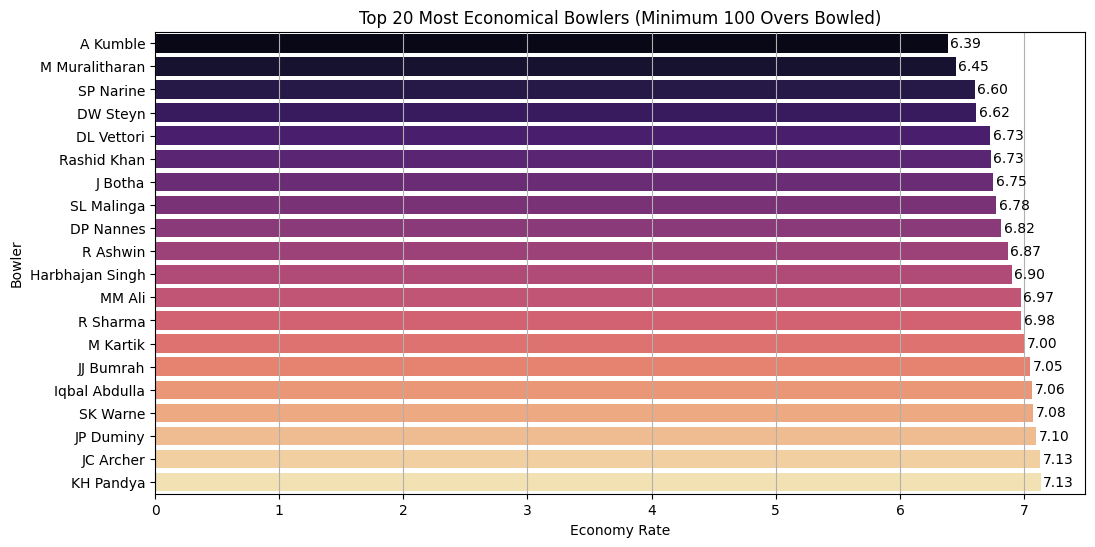

In [ ]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_20_most_economical_bowlers, x='economy_rate', y='bowler', palette='magma')
plt.title('Top 20 Most Economical Bowlers (Minimum 100 Overs Bowled)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.grid(axis='x')

# Annotating bars with their respective values
for index, row in top_20_most_economical_bowlers.iterrows():
    bar_plot.text(row['economy_rate'] + 0.02, index, f"{row['economy_rate']:.2f}", color='black', ha="left", va="center")

plt.show()

In [ ]:
# Counting the number of balls bowled for valid deliveries
balls_bowled = valid_deliveries.groupby('bowler')['ball'].count().reset_index(name='balls_bowled')

balls_bowled

bowler  balls_bowled
0    A Ashish Reddy           262
1          A Badoni            25
2        A Chandila           234
3       A Choudhary           101
4       A Dananjaya            24
..              ...           ...
525      Yash Dayal           578
526     Yash Thakur           404
527   Yudhvir Singh            72
528    Yuvraj Singh           869
529          Z Khan          2200

[530 rows x 2 columns]

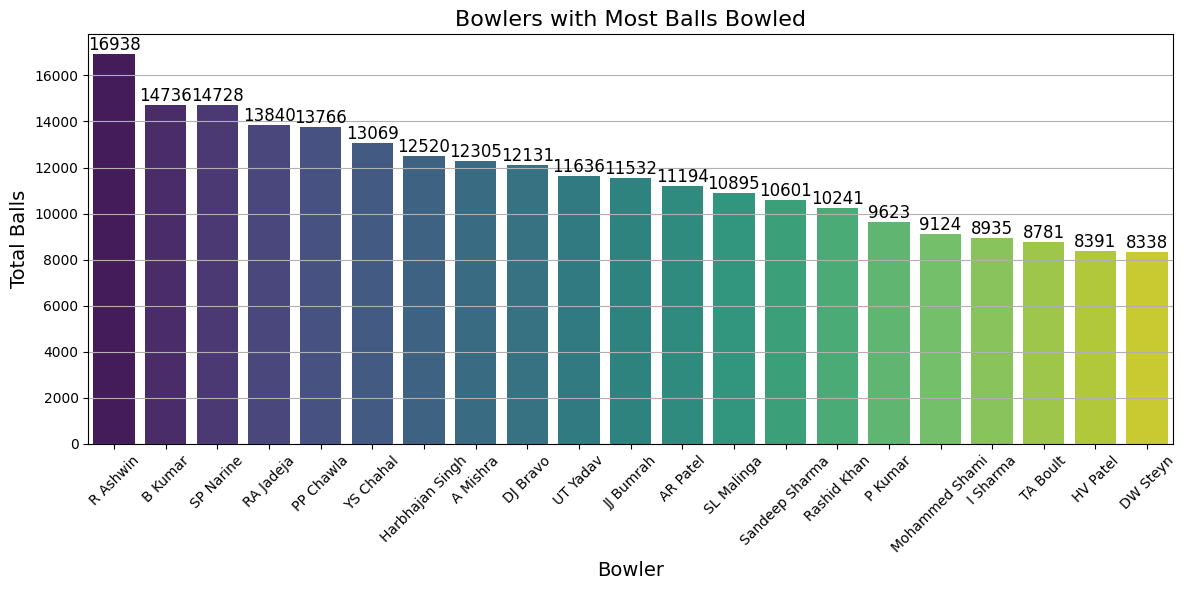

In [ ]:

all_overs = deliv[(deliv['over'] >= 0) & (deliv['over'] <= 19)]

# Grouping by bowler and summing the wickets taken
total_deliv = all_overs.groupby('bowler')['ball'].sum().reset_index(name='total_balls_bowled')

# Sorting the bowlers by total wickets in descending order
total_deliv = total_deliv.sort_values(by='total_balls_bowled', ascending=False)

# Getting the top 15 bowlers with most wickets in death overs
most_balls_bowled_bowler = total_deliv.head(21).reset_index(drop=True)

# Displayong the result
most_balls_bowled_bowler

# Plotting the top 15 bowlers who took most wickets in death overs
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=most_balls_bowled_bowler, x='bowler', y='total_balls_bowled', palette='viridis')

# Adding titles and labels
plt.title('Bowlers with Most Balls Bowled', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Balls', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding value on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)

plt.tight_layout()
plt.show()

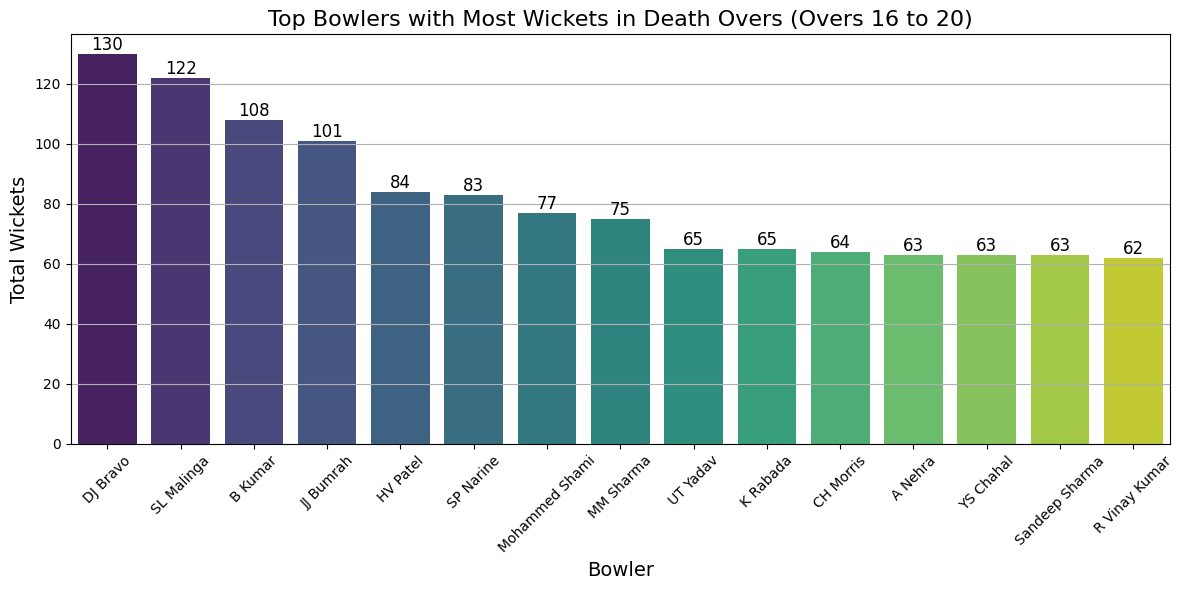

In [ ]:
# Filtering the data for death overs (over 16 to 20)
death_overs = deliv[(deliv['over'] >= 15) & (deliv['over'] <= 19)]

# Grouping by bowler and summing the wickets taken
wickets_in_death_overs = death_overs.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wickets')

# Sorting the bowlers by total wickets in descending order
most_wickets_death_overs = wickets_in_death_overs.sort_values(by='total_wickets', ascending=False)

# Getting the top 15 bowlers with most wickets in death overs
top_bowlers_death_overs = most_wickets_death_overs.head(15).reset_index(drop=True)

# Displayong the result
top_bowlers_death_overs



# Plotting the top 15 bowlers who took most wickets in death overs
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_bowlers_death_overs, x='bowler', y='total_wickets', palette='viridis')

# Adding titles and labels
plt.title('Top Bowlers with Most Wickets in Death Overs (Overs 16 to 20)', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding value on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)

plt.tight_layout()
plt.show()

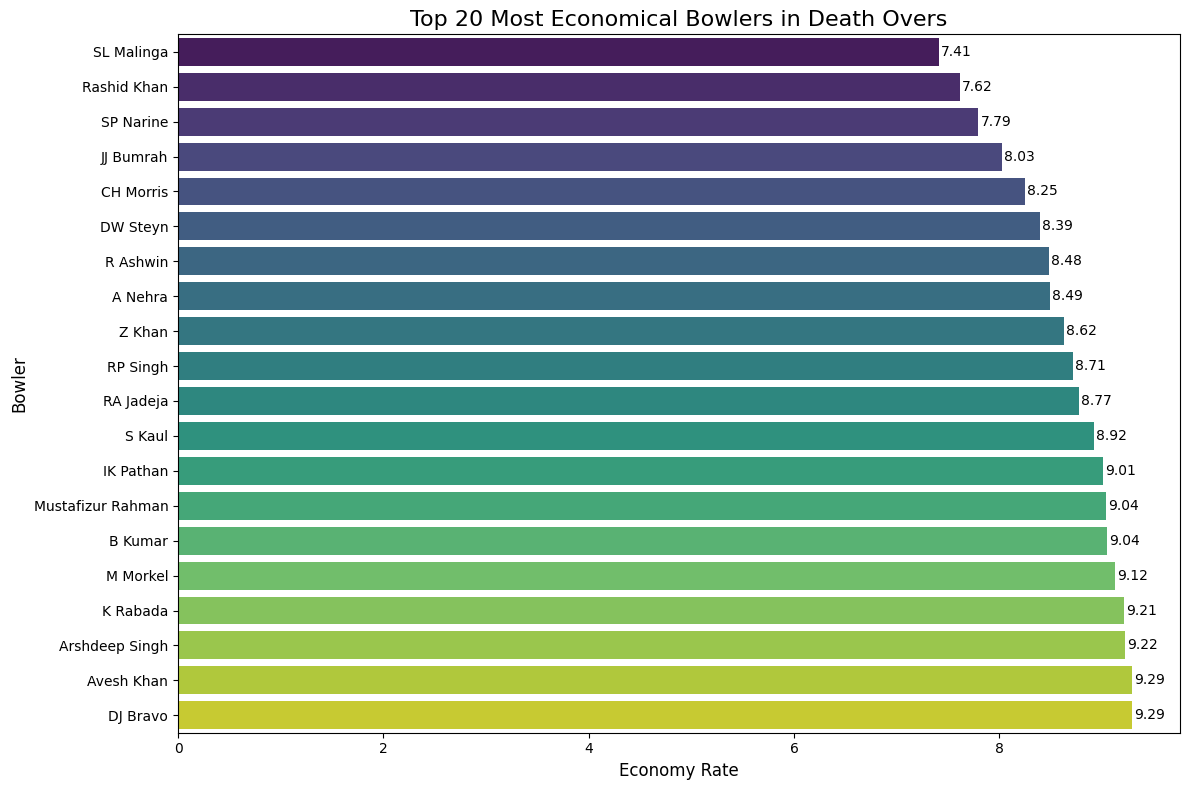

In [ ]:
# Filter for death overs and valid deliveries
death_overs = deliv[(deliv['over'] >= 16) & (deliv['over'] <= 20) & ~deliv['extras_type'].isin(['wides', 'noballs'])]

# Calculate runs conceded, overs bowled, and economy rate
bowler_stats = (
    death_overs.groupby('bowler')
    .agg(runs_conceded=('batsman_runs', 'sum'), balls_bowled=('ball', 'count'))
    .assign(overs_bowled=lambda x: x['balls_bowled'] / 6)
    .query('overs_bowled >= 50')
    .assign(economy_rate=lambda x: x['runs_conceded'] / x['overs_bowled'])
    .sort_values('economy_rate')
    .head(20)
)

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=bowler_stats.reset_index(), x='economy_rate', y='bowler', palette='viridis')

# Annotate economy rates next to the bars
for index, row in bowler_stats.reset_index().iterrows():
    plt.text(row['economy_rate'] + 0.02, index, f"{row['economy_rate']:.2f}", color='black', va='center', fontsize=10)

# Add labels and title
plt.title('Top 20 Most Economical Bowlers in Death Overs', fontsize=16)
plt.xlabel('Economy Rate', fontsize=12)
plt.ylabel('Bowler', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Filtering the data for deliveries where a wicket was taken
dismissals = deliv[deliv['is_wicket'] == 1]

# Grouping by dismissal type and count the number of each type
dismissal_counts = dismissals.groupby('dismissal_kind')['is_wicket'].count().reset_index(name='count')

# Sorting the dismissal types by their count in descending order
dismissal_counts = dismissal_counts.sort_values(by='count', ascending=False)
#dismissal_counts

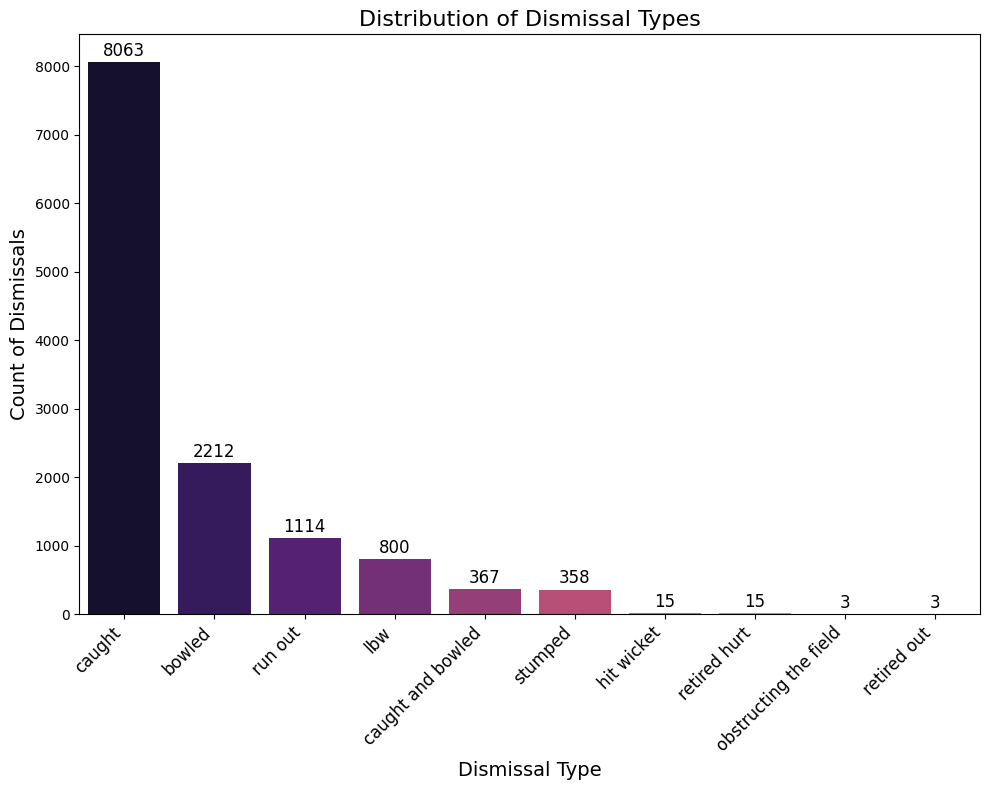

In [ ]:
# Plotting the distribution of dismissal types
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='dismissal_kind', y='count', data=dismissal_counts, palette='magma')

# Adding values on top of bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8),
                textcoords='offset points')


plt.title('Distribution of Dismissal Types', fontsize=16)
plt.xlabel('Dismissal Type', fontsize=14)
plt.ylabel('Count of Dismissals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [81]:
# Creating Function to check which bowler has dismissals most to batsman 
def top_bowlers_dismissing_batsman(batsman_name):
    # Filter the DataFrame for dismissals where the batsman is out
    dismissals = deliv[deliv['player_dismissed'] == batsman_name]

    # Grouping by bowler and count how many times they dismissed the batsman
    bowler_dismissals = dismissals.groupby('bowler').size().reset_index(name='dismissals')

    # Sorting by the number of dismissals and get the top 10 bowlers
    top_5_bowlers = bowler_dismissals.sort_values(by='dismissals', ascending=False).head(10)

    # Plotting graph 
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='bowler', y='dismissals', data=top_5_bowlers, palette='viridis')

    # Adding values on top of bars
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=12, xytext=(0, 8),
                    textcoords='offset points')
        

# Customizing titles and axis 
    plt.title(f'Top 5 Bowlers Who Dismissed {batsman_name} the Most', fontsize=16)
    plt.xlabel('Bowler', fontsize=14)
    plt.ylabel('Number of Dismissals', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels and adjust font size
    plt.tight_layout()
    plt.ylim(0,10)
    plt.show()


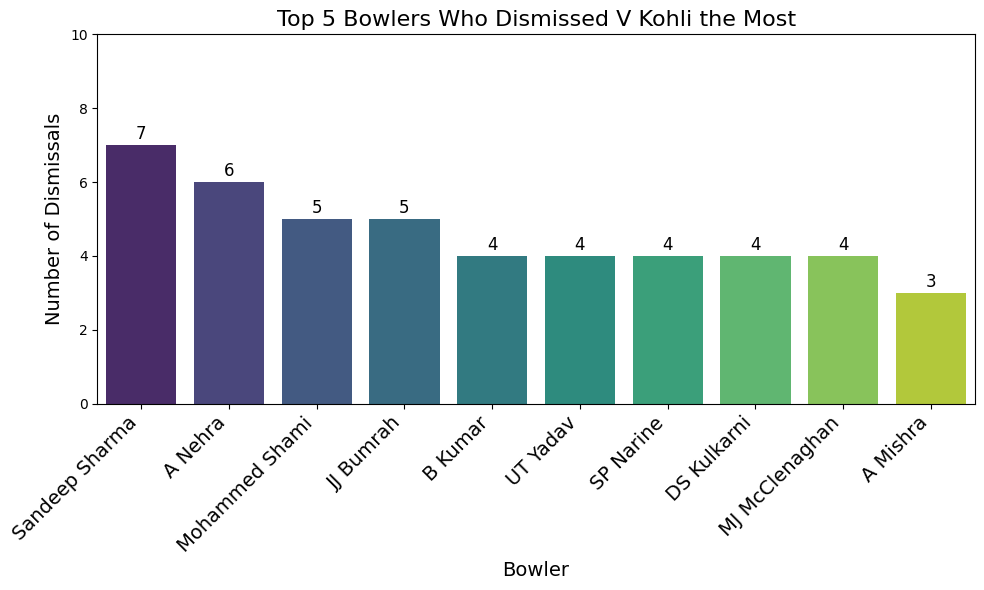

In [82]:
# Checking Dismissals of Virat kohli 
top_bowlers_dismissing_batsman('V Kohli')

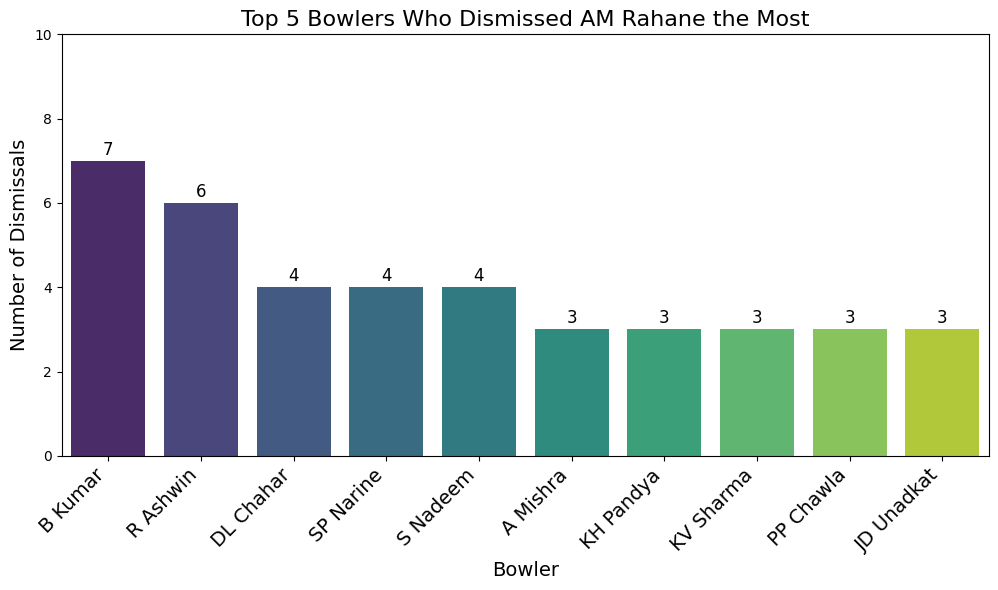

In [83]:
top_bowlers_dismissing_batsman('AM Rahane')

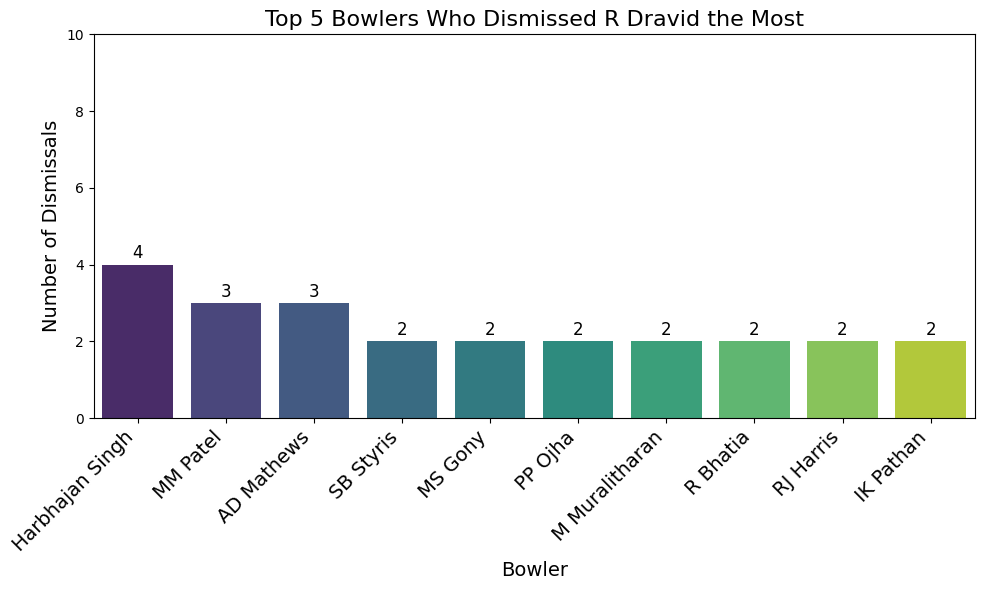

In [84]:
top_bowlers_dismissing_batsman('R Dravid')

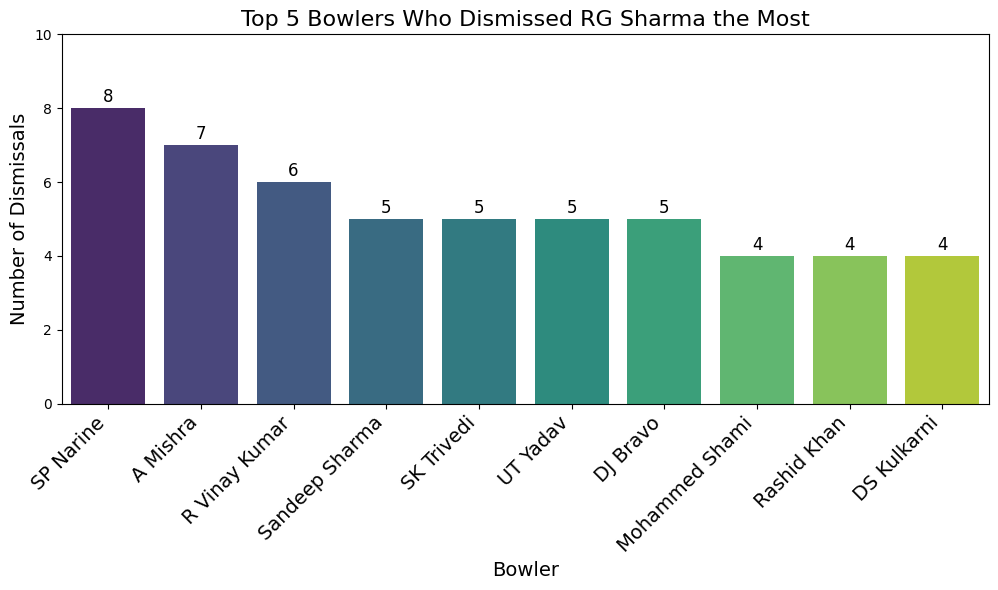

In [85]:
top_bowlers_dismissing_batsman('RG Sharma')

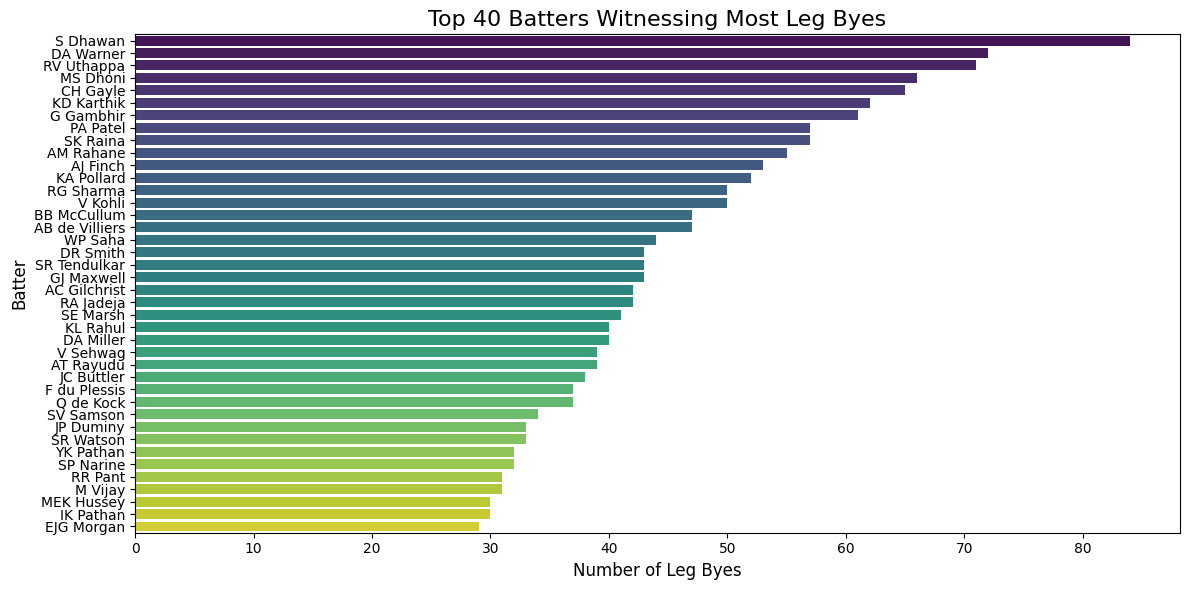

In [121]:
# Calculate total leg byes witnessed by each batter
legbyes_batter = (
    deliv[deliv['extras_type'] == 'legbyes']
    .groupby('batter')
    .size()
    .reset_index(name='legbyes_count')
    .sort_values('legbyes_count', ascending=False)
    .head(40)
)

# Plot the top 10 batters witnessing most leg byes
plt.figure(figsize=(12, 6))
sns.barplot(data=legbyes_batter, x='legbyes_count', y='batter', palette='viridis')
plt.title('Top 40 Batters Witnessing Most Leg Byes', fontsize=16)
plt.xlabel('Number of Leg Byes', fontsize=12)
plt.ylabel('Batter', fontsize=12)

# # Annotate the bar values
# for index, row in legbyes_batter.iterrows():
#     plt.text(row['legbyes_count'] + 0.2, index, f"{row['legbyes_count']}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [91]:
def analyze_batter_performance(batter_name, deliv):
    # Filter data for the given batter
    batter_data = deliv[deliv['batter'] == batter_name]
    
    # Total matches played
    matches_played = batter_data['match_id'].nunique()
    
    # Total dismissals
    dismissals = batter_data[batter_data['is_wicket'] == 1]
    total_outs = dismissals.shape[0]
    
    # Types of dismissals
    dismissal_types = (
        dismissals['dismissal_kind']
        .value_counts()
        .reset_index()
        .rename(columns={'index': 'dismissal_type', 'dismissal_kind': 'count'})
    )
    
    # Plot dismissal types
    plt.figure(figsize=(8, 6))
    sns.barplot(data=dismissal_types, x='count', y='dismissal_type', palette='viridis')
    plt.title(f'Dismissal Types for {batter_name}', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Dismissal Type', fontsize=12)

    # Annotate the bar values
    for index, row in dismissal_types.iterrows():
        plt.text(row['count'] + 0.2, index, f"{row['count']}", va='center', fontsize=10)

    plt.tight_layout()
    plt.show()
    
    return {
        'matches_played': matches_played,
        'total_outs': total_outs,
        'not_outs': matches_played - total_outs,
        'dismissal_types': dismissal_types
    }


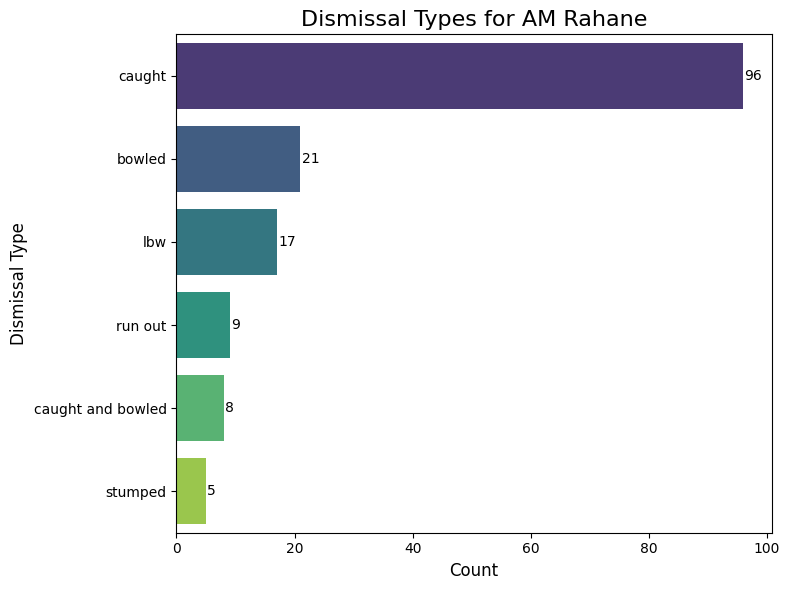

Matches Played: 171 

Total Outs: 156 

Not Outs: 15 



In [110]:
batter_name = 'AM Rahane'
batter_stats = analyze_batter_performance(batter_name, deliv)


print(f"Matches Played: {batter_stats['matches_played']}" , '\n')
print(f"Total Outs: {batter_stats['total_outs']}" , '\n')
print(f"Not Outs: {batter_stats['not_outs']}" , '\n')


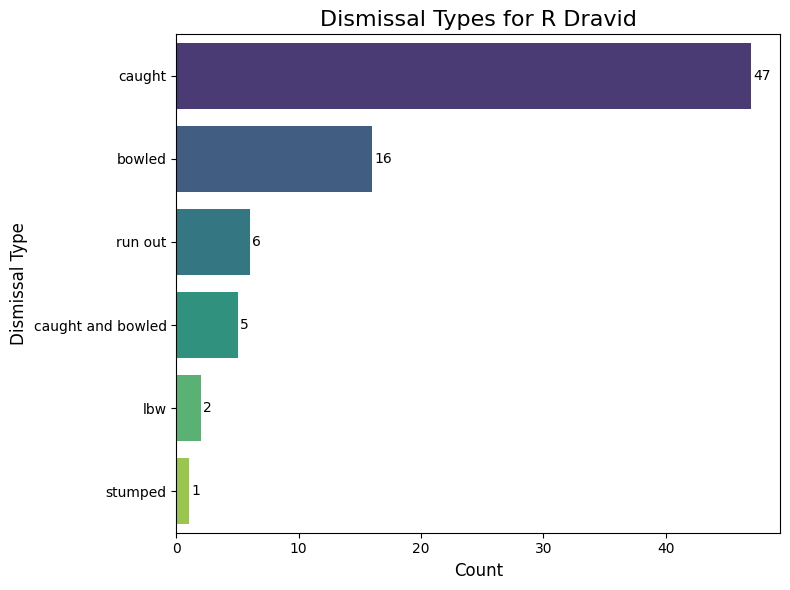

Matches Played: 82 

Total Outs: 77 

Not Outs: 5 



In [111]:
batter_name = 'R Dravid'
batter_stats = analyze_batter_performance(batter_name, deliv)


print(f"Matches Played: {batter_stats['matches_played']}" , '\n')
print(f"Total Outs: {batter_stats['total_outs']}" , '\n')
print(f"Not Outs: {batter_stats['not_outs']}" , '\n')



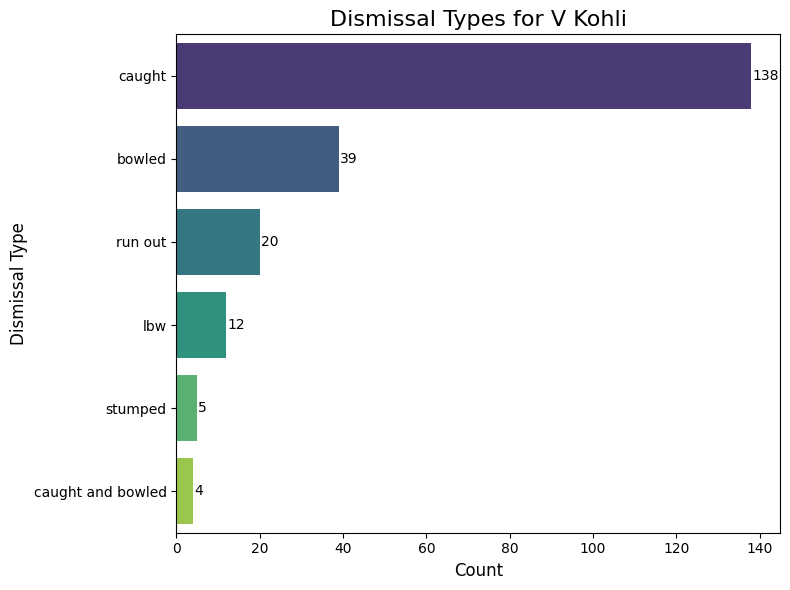

Matches Played: 244 

Total Outs: 218 

Not Outs: 26 



In [112]:
batter_name = 'V Kohli'
batter_stats = analyze_batter_performance(batter_name, deliv)


print(f"Matches Played: {batter_stats['matches_played']}" , '\n')
print(f"Total Outs: {batter_stats['total_outs']}" , '\n')
print(f"Not Outs: {batter_stats['not_outs']}" , '\n')


In [113]:
# Creating Function to check most run scorer batsman against Bowler
def top_batsmen_against_bowler(bowler_name):
    # Filter the DataFrame for deliveries bowled by the specific bowler
    deliveries_by_bowler = deliv[deliv['bowler'] == bowler_name]

    # Grouping by batsman and suming the total runs scored against the bowler
    batsman_runs = deliveries_by_bowler.groupby('batter')['batsman_runs'].sum().reset_index(name='runs_scored')

    # Sorting by runs scored and get the top 10 batsmen
    top_10_batsmen = batsman_runs.sort_values(by='runs_scored', ascending=False).head(20)

    # Plotting using seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='batter', y='runs_scored', data=top_10_batsmen, palette='magma')

    # Adding values on top of bars
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=12, xytext=(0, 8),
                    textcoords='offset points')
        
    # Customizing plot aesthetics
    plt.title(f'Top 20 Batsmen Scoring Most Runs Against {bowler_name}', fontsize=16)
    plt.xlabel('Batsman', fontsize=14)
    plt.ylabel('Runs Scored', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels and adjust font size
    plt.tight_layout()
    plt.ylim(0,200)
    plt.show()

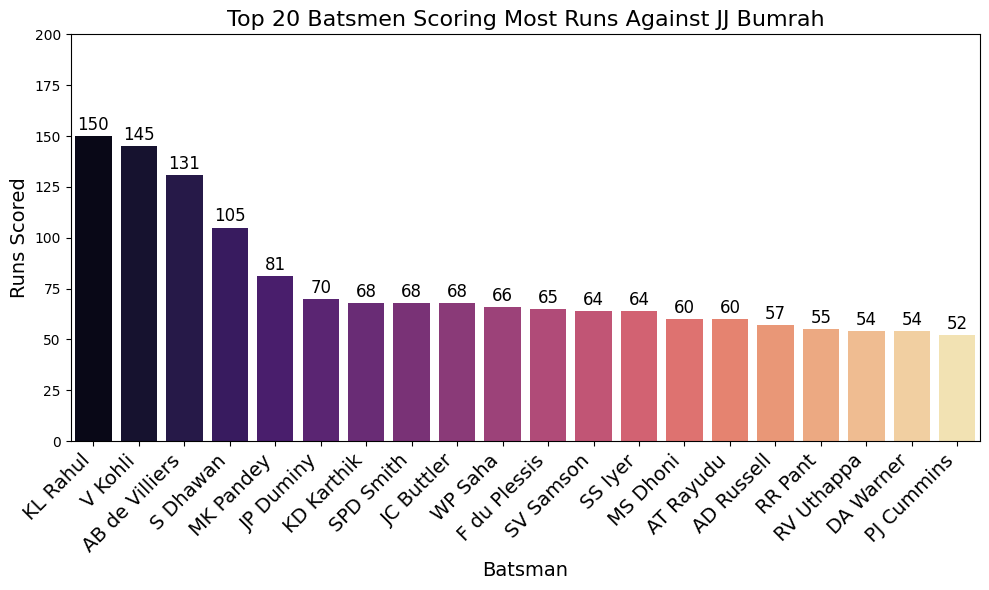

In [114]:
top_batsmen_against_bowler('JJ Bumrah')

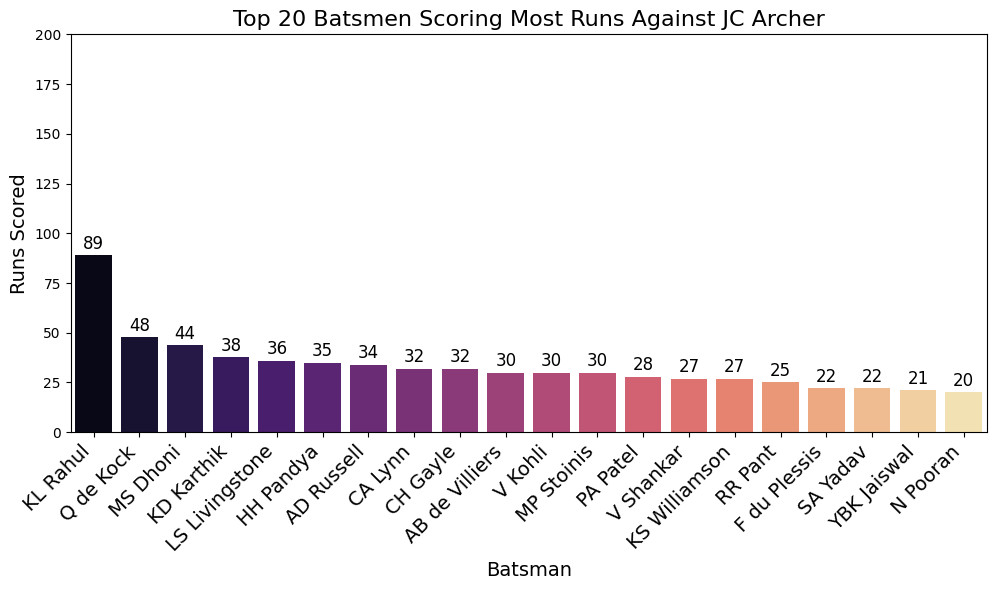

In [115]:
top_batsmen_against_bowler('JC Archer')

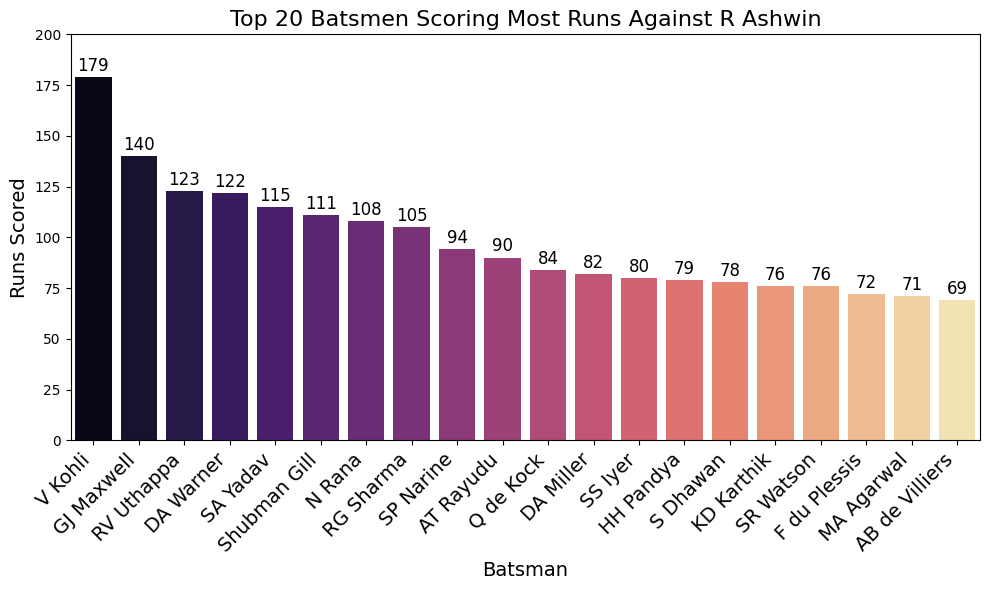

In [116]:
top_batsmen_against_bowler('R Ashwin')

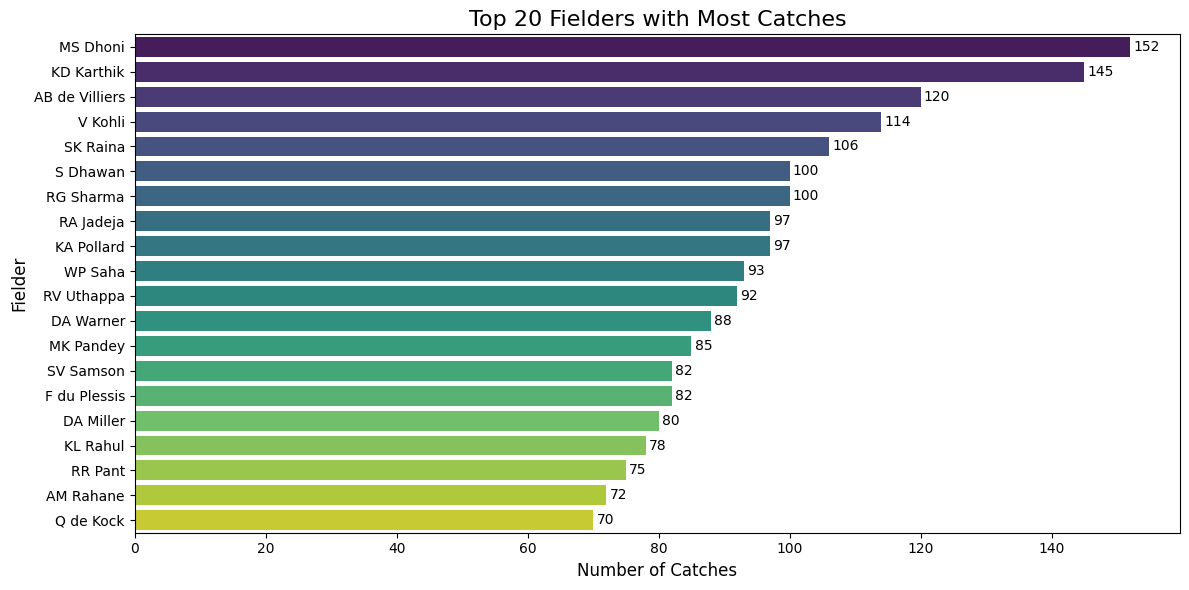

In [127]:
# Filter for dismissals where a fielder is involved
catch_data = deliv[deliv['dismissal_kind'] == 'caught']

# Count catches by each fielder
fielder_catches = (
    catch_data['fielder']
    .value_counts()
    .reset_index(name='catches')
    .rename(columns={'index': 'fielder'})
    .head(20)
)

# Plot the top 20 fielders with most catches
plt.figure(figsize=(12, 6))
sns.barplot(data=fielder_catches, x='catches', y='fielder', palette='viridis')
plt.title('Top 20 Fielders with Most Catches', fontsize=16)
plt.xlabel('Number of Catches', fontsize=12)
plt.ylabel('Fielder', fontsize=12)

# Annotate the bar values
for index, row in fielder_catches.iterrows():
    plt.text(row['catches'] + 0.5, index, f"{row['catches']}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


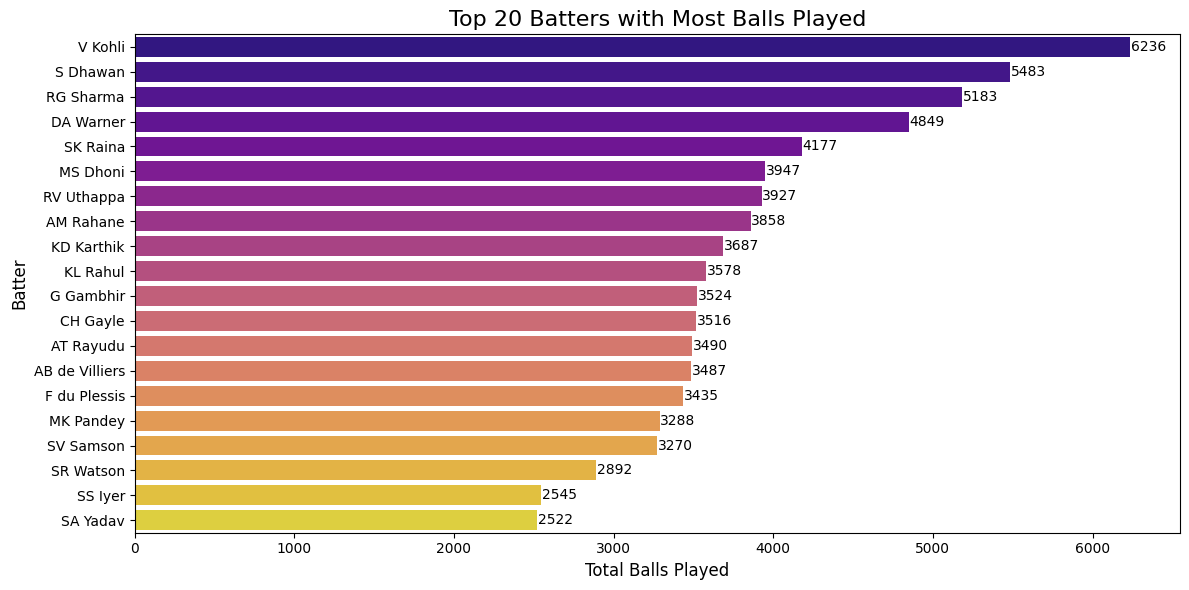

In [128]:
# Count total balls played by each batter
balls_played = (
    deliv['batter']
    .value_counts()
    .reset_index(name='balls_played')
    .rename(columns={'index': 'batter'})
    .head(20)
)

# Plot the top 20 batters with most balls played
plt.figure(figsize=(12, 6))
sns.barplot(data=balls_played, x='balls_played', y='batter', palette='plasma')
plt.title('Top 20 Batters with Most Balls Played', fontsize=16)
plt.xlabel('Total Balls Played', fontsize=12)
plt.ylabel('Batter', fontsize=12)

# Annotate the bar values
for index, row in balls_played.iterrows():
    plt.text(row['balls_played'] + 5, index, f"{row['balls_played']}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


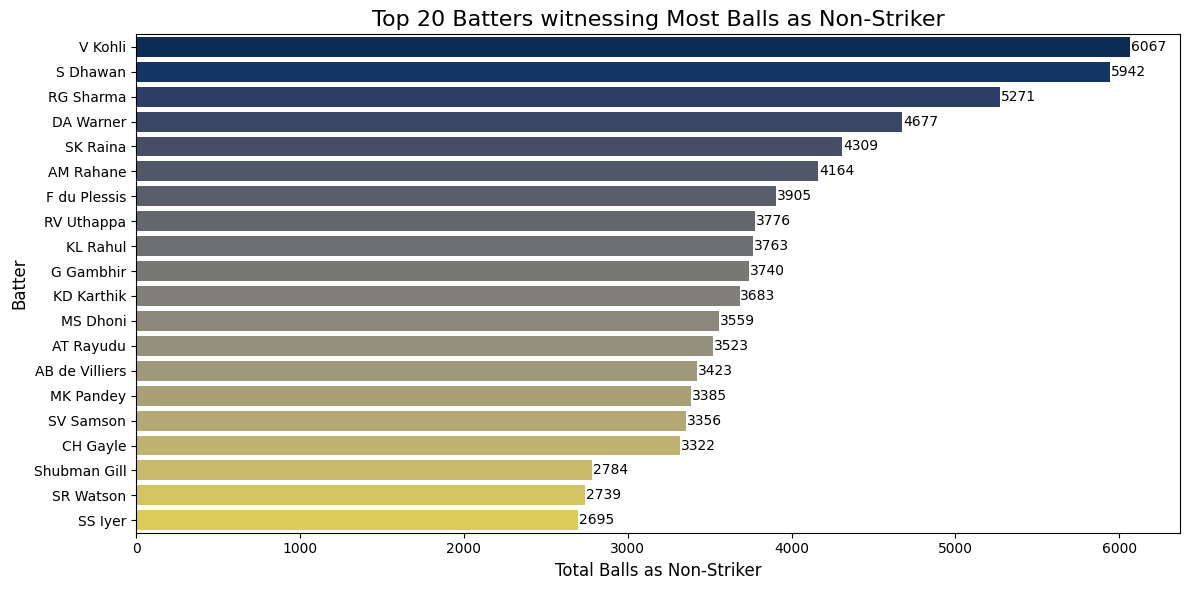

In [126]:
# Count total balls on non-striking end for each batter
non_striker_balls = (
    deliv['non_striker']
    .value_counts()
    .reset_index(name='balls_non_striker')
    .rename(columns={'index': 'batter'})
    .head(20)
)

# Plot the top 20 batters with most balls as non-striker
plt.figure(figsize=(12, 6))
sns.barplot(data=non_striker_balls, x='balls_non_striker', y='batter', palette='cividis')
plt.title('Top 20 Batters witnessing Most Balls as Non-Striker', fontsize=16)
plt.xlabel('Total Balls as Non-Striker', fontsize=12)
plt.ylabel('Batter', fontsize=12)

# Annotate the bar values
for index, row in non_striker_balls.iterrows():
    plt.text(row['balls_non_striker'] + 5, index, f"{row['balls_non_striker']}", va='center', fontsize=10)

plt.tight_layout()
plt.show()
